## Problem Statement

**Using data to have a better understanding of the target customers for insurance purchases.**
<br>
<br> **What are the features that will distinguish one customer from each other?** The straightforward way to answer this question is using unsupervised learning technique (KMeans clustering). The goal is to group the customer data to different clusters. In such a way, each group/cluster will consist of features that will distinguish one from the other. And this will guide you to estimate how much the yearly/monthly premiums they are willing to pay or what policy the customer would most likely to purchase.  
<br> **Identify any seasonal influences in purchasing a product.** They could be seasons/time that will alter a person's willingness to buy. In investigating this, the marketing department can often influence/dictate, how, and when people will spend their money.  

### Contents:
- [Data](#Data)
- [EDA](#EDA)
- [Marketing calendar](#Marketing-calendar)
- [Customer segmentation](#Customer-segmentation)


In [1]:
# Import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import datetime as dt

from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from scipy.spatial import distance
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D

### Data

Import data

In [2]:
data = pd.read_excel('Data.xlsx')

In [3]:
data.shape

(19960, 34)

In [4]:
pd.set_option('display.max_columns', 50)
data.head(10)

,POLICY_REF_DUMMY,PROPOSAL_SUBMISSION_DATE,ISSUE_DATE,ST_DATE,POL_ST,PRODUCT_CATEGORY,PROD_TYPE,PRODUCT_NAME_L1,BASIC_COVER_TYPE,COVER_TYPE,INSURED_AMT,PREMIUM,PAY_TERM,PAY_METHOD,PAY_MODE,PAY_AGE,LIFE_TO_BE_COVERED_DUMMY,PART_ID_DUMMY,RELATIONSHIP,RELATIONSHIP_BIN,ENTRY_AGE,GENDER,OCCUPATION_CLASS,HEIGHT,WEIGHT,MEDICAL_FLAG,NATIONALITY_DUMMY,REGION_DUMMY,OWNER_AGE,OWNER_GENDER,OWNER_OCCUPATION_CLASS,CLASS_ORDER,SERV_BRANCH_DUMMY,AGENT_CD_DUMMY
0,POLID_6930,NaN,2013-03-19,2014-04-23,SURRENDERED,Investment,UL,Optimal Power,UNIT LINK,Basic,125000.0,100000.0,1.0,Single Pay,Cash/Check,35.0,PART_ID_10751,NaN,SELF,SELF,34,F,NaN,"5,1,FI",115 P,NaN,NATIONALITY_ID_1,REGION_11,34.0,F,NaN,0,SERV_BRANCH_398,NaN
1,POLID_3215,2011-06-30 00:00:00,2011-06-15,2011-06-08,Inforce,Retirement,NUL,Velocity,ANTICIPATED ENDOWMENT,Basic,500000.0,161515.0,5.0,Annual,Cash/Check,58.0,PART_ID_8104,NaN,SELF,SELF,53,F,"HOSPITAL, NURSING HOME, CLINIC, ASSYLUM","5,2,FI",54 K,NaN,NATIONALITY_ID_1,REGION_2,53.0,F,"HOSPITAL, NURSING HOME, CLINIC, ASSYLUM",4,SERV_BRANCH_452,AGENT_CD_58
2,POLID_7224,NaN,2013-06-18,2013-06-17,INFORCE,Investment,UL,Optimum Gold,UNIT LINK,Basic,562500.0,450000.0,1.0,Single Pay,Cash/Check,60.0,PART_ID_15437,NaN,SELF,SELF,59,F,NaN,"5,2,FI",140 P,NaN,NATIONALITY_ID_1,REGION_1,59.0,F,NaN,0,SERV_BRANCH_564,AGENT_CD_42
3,POLID_54,NaN,2010-12-14,2010-12-13,Inforce,Retirement,NUL,Velocity,ANTICIPATED ENDOWMENT,Basic,100000.0,26745.0,5.0,Annual,Cash/Check,24.0,PART_ID_5553,PART_ID_578,DAUGHTER,CHILDREN,19,F,STUDENT,"5,0,FI",100 P,NaN,NATIONALITY_ID_1,REGION_10,50.0,F,BANK,10,SERV_BRANCH_600,AGENT_CD_41
4,POLID_54,NaN,2010-12-14,2010-12-13,Inforce,Protection,NUL,NaN,ACC DEATH & DISMEMBERMENT,Rider,100000.0,443.0,5.0,Annual,Cash/Check,24.0,PART_ID_5553,PART_ID_578,DAUGHTER,CHILDREN,19,F,STUDENT,"5,0,FI",100 P,NaN,NATIONALITY_ID_1,REGION_10,50.0,F,BANK,10,SERV_BRANCH_600,AGENT_CD_41
5,POLID_54,NaN,2010-12-14,2010-12-13,Inforce,Protection,NUL,NaN,LIVING BENEFIT,Rider,100000.0,0.0,0.0,Annual,Cash/Check,19.0,PART_ID_5553,PART_ID_578,DAUGHTER,CHILDREN,19,F,STUDENT,"5,0,FI",100 P,NaN,NATIONALITY_ID_1,REGION_10,50.0,F,BANK,10,SERV_BRANCH_600,AGENT_CD_41
6,POLID_7270,NaN,2013-04-09,2014-04-23,SURRENDERED,Investment,UL,Optimum Gold,UNIT LINK,Basic,625000.0,500000.0,1.0,Single Pay,Cash/Check,61.0,PART_ID_10642,NaN,SELF,SELF,60,M,NaN,"5,7,FI",160 P,NaN,NATIONALITY_ID_1,REGION_11,60.0,M,NaN,0,SERV_BRANCH_596,AGENT_CD_66
7,POLID_9796,2013-09-30 00:00:00,2013-11-05,2013-11-06,INFORCE,Investment,UL,VIP Summit,UNIT LINK,Basic,552125.0,441700.0,1.0,Single Pay,Cash/Check,62.0,PART_ID_5084,NaN,SELF,SELF,61,F,"LAWYER, ATTORNEY","5,,FI",140 P,NaN,NATIONALITY_ID_1,REGION_10,61.0,F,"LAWYER, ATTORNEY",3,SERV_BRANCH_252,NaN
8,POLID_9803,2013-06-30 00:00:00,2013-07-31,2013-08-01,INFORCE,Investment,UL,VIP Summit,UNIT LINK,Basic,375000.0,300000.0,1.0,Single Pay,Cash/Check,61.0,PART_ID_5084,NaN,SELF,SELF,60,F,"LAWYER,ATTORNEY","5,0,FI",140 P,NaN,NATIONALITY_ID_1,REGION_10,60.0,F,"LAWYER,ATTORNEY",3,SERV_BRANCH_252,AGENT_CD_9
9,POLID_8286,2011-09-30 00:00:00,2011-09-27,2011-09-28,INFORCE,Investment,UL,Asian Summit,UNIT LINK,Basic,1500000.0,1000000.0,1.0,Single Pay,Cash/Check,35.0,PART_ID_11671,NaN,SELF,SELF,34,F,BUSINESSMAN/ / BUSINESSWOMAN,"165,,CM",50 K,NaN,NATIONALITY_ID_1,REGION_14,34.0,F,BUSINESSMAN/ / BUSINESSWOMAN,2,SERV_BRANCH_314,AGENT_CD_92


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19960 entries, 0 to 19959
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   POLICY_REF_DUMMY          19960 non-null  object        
 1   PROPOSAL_SUBMISSION_DATE  15001 non-null  object        
 2   ISSUE_DATE                19960 non-null  datetime64[ns]
 3   ST_DATE                   19960 non-null  datetime64[ns]
 4   POL_ST                    19960 non-null  object        
 5   PRODUCT_CATEGORY          19960 non-null  object        
 6   PROD_TYPE                 19960 non-null  object        
 7   PRODUCT_NAME_L1           12380 non-null  object        
 8   BASIC_COVER_TYPE          19960 non-null  object        
 9   COVER_TYPE                19960 non-null  object        
 10  INSURED_AMT               19548 non-null  float64       
 11  PREMIUM                   18928 non-null  float64       
 12  PAY_TERM          

In [6]:
# change column names to lower
data.columns = data.columns.str.lower()

In [7]:
data.isnull().sum()

policy_ref_dummy                0
proposal_submission_date     4959
issue_date                      0
st_date                         0
pol_st                          0
product_category                0
prod_type                       0
product_name_l1              7580
basic_cover_type                0
cover_type                      0
insured_amt                   412
premium                      1032
pay_term                      893
pay_method                      0
pay_mode                        0
pay_age                       893
life_to_be_covered_dummy        0
part_id_dummy               12139
relationship                    0
relationship_bin                0
entry_age                       0
gender                          0
occupation_class              920
height                        988
weight                        557
medical_flag                19634
nationality_dummy              63
region_dummy                  156
owner_age                      24
owner_gender  

Since there are 19960 data points, 'medical_flag' and 'part_id_dummy' would be dropped. 'NaN' in 'part_id_dummy', means that customer ID (policyowner) is in 'life_to_be_covered_dummy' anyways. 

In [8]:
data.drop(columns=['medical_flag','part_id_dummy'],inplace=True)

While it's possible to have zero-premium plans, and 'premium' can be '0'. Not possible for 'insured_amt' amount to be 'NaN' or '0'? When 'insured_amt' is missing, both columns also seemed to be missing. Not the case when 'premium' is missing.

In [9]:
data[data['insured_amt'].isnull()]

,policy_ref_dummy,proposal_submission_date,issue_date,st_date,pol_st,product_category,prod_type,product_name_l1,basic_cover_type,cover_type,insured_amt,premium,pay_term,pay_method,pay_mode,pay_age,life_to_be_covered_dummy,relationship,relationship_bin,entry_age,gender,occupation_class,height,weight,nationality_dummy,region_dummy,owner_age,owner_gender,owner_occupation_class,class_order,serv_branch_dummy,agent_cd_dummy
196,POLID_8548,2014-04-30 00:00:00,2014-04-23,2014-04-23,INFORCE,Protection,UL,NaN,LIFE EVENT RIDER,Rider,NaN,NaN,NaN,Semi-Annual,Cash/Check,NaN,PART_ID_8129,SELF,SELF,33,M,BUSINESSMAN/ / BUSINESSWOMAN,"5,9,FI",160 P,NATIONALITY_ID_1,REGION_2,33.0,M,BUSINESSMAN/ / BUSINESSWOMAN,2,SERV_BRANCH_514,AGENT_CD_63
215,POLID_7589,2015-08-31 00:00:00,2015-09-28,2015-09-28,INFORCE,Protection,UL,NaN,LIFE EVENT RIDER,Rider,NaN,NaN,NaN,Quarterly,Cash/Check,NaN,PART_ID_10472,SELF,SELF,36,F,BANK,"5,4,FI",160 P,NATIONALITY_ID_1,REGION_11,36.0,F,BANK,10,SERV_BRANCH_317,AGENT_CD_269
227,POLID_7559,2013-01-31 00:00:00,2013-01-15,2013-01-08,INFORCE,Protection,UL,NaN,LIFE EVENT RIDER,Rider,NaN,NaN,NaN,Annual,Cash/Check,NaN,PART_ID_8037,SELF,SELF,45,F,BANK,"5,1,FI",120 P,NATIONALITY_ID_1,REGION_2,45.0,F,BANK,10,SERV_BRANCH_301,NaN
237,POLID_9790,2014-05-31 00:00:00,2014-05-20,2014-05-15,INFORCE,Protection,UL,NaN,LIFE EVENT RIDER,Rider,NaN,NaN,NaN,Annual,Cash/Check,NaN,PART_ID_15452,SELF,SELF,34,F,"LAWYER, ATTORNEY","5,3,FI",130 P,NATIONALITY_ID_1,REGION_1,34.0,F,"LAWYER, ATTORNEY",3,SERV_BRANCH_599,AGENT_CD_14
311,POLID_11490,2016-02-29 00:00:00,2016-03-08,2016-03-08,INFORCE,Protection,UL,NaN,LIFE EVENT RIDER,Rider,NaN,NaN,NaN,Annual,Cash/Check,NaN,PART_ID_14006,SELF,SELF,38,F,SEAMAN / SEAFARER,"5,2,FI",143 P,NATIONALITY_ID_1,REGION_3,38.0,F,SEAMAN / SEAFARER,5,SERV_BRANCH_570,AGENT_CD_48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19543,POLID_6112,2016-02-29 00:00:00,2016-03-10,2016-03-05,INFORCE,Protection,UL,NaN,LIFE EVENT RIDER,Rider,NaN,NaN,NaN,Annual,Cash/Check,NaN,PART_ID_14173,MOTHER,PARENTS,13,M,JUVENILE,"5,1,FI",105 P,NATIONALITY_ID_1,REGION_3,42.0,F,BANK,10,SERV_BRANCH_33,AGENT_CD_224
19545,POLID_6113,2016-02-29 00:00:00,2016-03-15,2016-03-15,INFORCE,Protection,UL,NaN,LIFE EVENT RIDER,Rider,NaN,NaN,NaN,Annual,Cash/Check,NaN,PART_ID_14174,MOTHER,PARENTS,8,M,JUVENILE,"4,6,FI",68 P,NATIONALITY_ID_1,REGION_3,42.0,F,BANK,10,SERV_BRANCH_33,AGENT_CD_224
19755,POLID_6477,2013-01-31 00:00:00,2013-01-22,2013-01-17,INFORCE,Protection,UL,NaN,LIFE EVENT RIDER,Rider,NaN,NaN,NaN,Annual,Cash/Check,NaN,PART_ID_14447,MOTHER,PARENTS,13,M,STUDENT,"5,2,FI",120 P,NATIONALITY_ID_1,REGION_3,49.0,F,HOUSEWIFE,1,SERV_BRANCH_10,NaN
19757,POLID_6569,2013-02-28 00:00:00,2013-02-25,2014-04-10,SURRENDERED,Protection,UL,NaN,LIFE EVENT RIDER,Rider,NaN,NaN,NaN,Annual,Cash/Check,NaN,PART_ID_13307,MOTHER,PARENTS,0,M,JUVENILE,NaN,9.7 K,NATIONALITY_ID_1,REGION_3,34.0,F,OFFICE WORKER,2,SERV_BRANCH_569,AGENT_CD_48


In [10]:
data[data['premium'].isnull()]

,policy_ref_dummy,proposal_submission_date,issue_date,st_date,pol_st,product_category,prod_type,product_name_l1,basic_cover_type,cover_type,insured_amt,premium,pay_term,pay_method,pay_mode,pay_age,life_to_be_covered_dummy,relationship,relationship_bin,entry_age,gender,occupation_class,height,weight,nationality_dummy,region_dummy,owner_age,owner_gender,owner_occupation_class,class_order,serv_branch_dummy,agent_cd_dummy
196,POLID_8548,2014-04-30 00:00:00,2014-04-23,2014-04-23,INFORCE,Protection,UL,NaN,LIFE EVENT RIDER,Rider,NaN,NaN,NaN,Semi-Annual,Cash/Check,NaN,PART_ID_8129,SELF,SELF,33,M,BUSINESSMAN/ / BUSINESSWOMAN,"5,9,FI",160 P,NATIONALITY_ID_1,REGION_2,33.0,M,BUSINESSMAN/ / BUSINESSWOMAN,2,SERV_BRANCH_514,AGENT_CD_63
215,POLID_7589,2015-08-31 00:00:00,2015-09-28,2015-09-28,INFORCE,Protection,UL,NaN,LIFE EVENT RIDER,Rider,NaN,NaN,NaN,Quarterly,Cash/Check,NaN,PART_ID_10472,SELF,SELF,36,F,BANK,"5,4,FI",160 P,NATIONALITY_ID_1,REGION_11,36.0,F,BANK,10,SERV_BRANCH_317,AGENT_CD_269
227,POLID_7559,2013-01-31 00:00:00,2013-01-15,2013-01-08,INFORCE,Protection,UL,NaN,LIFE EVENT RIDER,Rider,NaN,NaN,NaN,Annual,Cash/Check,NaN,PART_ID_8037,SELF,SELF,45,F,BANK,"5,1,FI",120 P,NATIONALITY_ID_1,REGION_2,45.0,F,BANK,10,SERV_BRANCH_301,NaN
237,POLID_9790,2014-05-31 00:00:00,2014-05-20,2014-05-15,INFORCE,Protection,UL,NaN,LIFE EVENT RIDER,Rider,NaN,NaN,NaN,Annual,Cash/Check,NaN,PART_ID_15452,SELF,SELF,34,F,"LAWYER, ATTORNEY","5,3,FI",130 P,NATIONALITY_ID_1,REGION_1,34.0,F,"LAWYER, ATTORNEY",3,SERV_BRANCH_599,AGENT_CD_14
311,POLID_11490,2016-02-29 00:00:00,2016-03-08,2016-03-08,INFORCE,Protection,UL,NaN,LIFE EVENT RIDER,Rider,NaN,NaN,NaN,Annual,Cash/Check,NaN,PART_ID_14006,SELF,SELF,38,F,SEAMAN / SEAFARER,"5,2,FI",143 P,NATIONALITY_ID_1,REGION_3,38.0,F,SEAMAN / SEAFARER,5,SERV_BRANCH_570,AGENT_CD_48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19863,POLID_4327,2015-04-30 00:00:00,2015-06-16,2015-06-05,Inforce,Savings,NUL,NaN,ENDOWMENT RIDER,Rider,100000.0,NaN,19.0,Monthly,Salary Deduction,60.0,PART_ID_7444,SELF,SELF,41,M,BANK,"5,5,FI",77 K,NATIONALITY_ID_1,REGION_12,41.0,M,BANK,10,SERV_BRANCH_260,NaN
19864,POLID_4327,2015-04-30 00:00:00,2015-06-16,2015-06-05,Inforce,Health,NUL,NaN,MEDICAL EXPENSES,Rider,25000.0,NaN,19.0,Monthly,Salary Deduction,60.0,PART_ID_7444,SELF,SELF,41,M,BANK,"5,5,FI",77 K,NATIONALITY_ID_1,REGION_12,41.0,M,BANK,10,SERV_BRANCH_260,NaN
19865,POLID_4327,2015-04-30 00:00:00,2015-06-16,2015-06-05,Inforce,Protection,NUL,NaN,TERM RIDER,Rider,25000.0,NaN,19.0,Monthly,Salary Deduction,60.0,PART_ID_7444,SELF,SELF,41,M,BANK,"5,5,FI",77 K,NATIONALITY_ID_1,REGION_12,41.0,M,BANK,10,SERV_BRANCH_260,NaN
19882,POLID_6135,2014-06-30 00:00:00,2014-06-26,2014-06-20,INFORCE,Protection,UL,NaN,ACC DEATH & DISMEMBERMENT,Rider,125000.0,NaN,NaN,Single Pay,Cash/Check,NaN,PART_ID_15271,MOTHER,PARENTS,16,F,STUDENT,"162.56,,CM",95 P,NATIONALITY_ID_1,REGION_1,41.0,F,BUSINESSMAN/ / BUSINESSWOMAN,2,SERV_BRANCH_409,NaN


In [11]:
# possible to have zero-premium plan. 
data['premium'] = data['premium'].fillna(0)

In [12]:
data[data['proposal_submission_date'].isnull()]

,policy_ref_dummy,proposal_submission_date,issue_date,st_date,pol_st,product_category,prod_type,product_name_l1,basic_cover_type,cover_type,insured_amt,premium,pay_term,pay_method,pay_mode,pay_age,life_to_be_covered_dummy,relationship,relationship_bin,entry_age,gender,occupation_class,height,weight,nationality_dummy,region_dummy,owner_age,owner_gender,owner_occupation_class,class_order,serv_branch_dummy,agent_cd_dummy
0,POLID_6930,NaN,2013-03-19,2014-04-23,SURRENDERED,Investment,UL,Optimal Power,UNIT LINK,Basic,125000.00,100000.00,1.0,Single Pay,Cash/Check,35.0,PART_ID_10751,SELF,SELF,34,F,NaN,"5,1,FI",115 P,NATIONALITY_ID_1,REGION_11,34.0,F,NaN,0,SERV_BRANCH_398,NaN
2,POLID_7224,NaN,2013-06-18,2013-06-17,INFORCE,Investment,UL,Optimum Gold,UNIT LINK,Basic,562500.00,450000.00,1.0,Single Pay,Cash/Check,60.0,PART_ID_15437,SELF,SELF,59,F,NaN,"5,2,FI",140 P,NATIONALITY_ID_1,REGION_1,59.0,F,NaN,0,SERV_BRANCH_564,AGENT_CD_42
3,POLID_54,NaN,2010-12-14,2010-12-13,Inforce,Retirement,NUL,Velocity,ANTICIPATED ENDOWMENT,Basic,100000.00,26745.00,5.0,Annual,Cash/Check,24.0,PART_ID_5553,DAUGHTER,CHILDREN,19,F,STUDENT,"5,0,FI",100 P,NATIONALITY_ID_1,REGION_10,50.0,F,BANK,10,SERV_BRANCH_600,AGENT_CD_41
4,POLID_54,NaN,2010-12-14,2010-12-13,Inforce,Protection,NUL,NaN,ACC DEATH & DISMEMBERMENT,Rider,100000.00,443.00,5.0,Annual,Cash/Check,24.0,PART_ID_5553,DAUGHTER,CHILDREN,19,F,STUDENT,"5,0,FI",100 P,NATIONALITY_ID_1,REGION_10,50.0,F,BANK,10,SERV_BRANCH_600,AGENT_CD_41
5,POLID_54,NaN,2010-12-14,2010-12-13,Inforce,Protection,NUL,NaN,LIVING BENEFIT,Rider,100000.00,0.00,0.0,Annual,Cash/Check,19.0,PART_ID_5553,DAUGHTER,CHILDREN,19,F,STUDENT,"5,0,FI",100 P,NATIONALITY_ID_1,REGION_10,50.0,F,BANK,10,SERV_BRANCH_600,AGENT_CD_41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19916,POLID_2824,NaN,2010-08-24,2010-08-10,Inforce,Protection,NUL,NaN,ACC DEATH & DISMEMBERMENT,Rider,200000.00,1316.00,5.0,Semi-Annual,Cash/Check,49.0,PART_ID_12203,SELF,SELF,44,M,BUSINESSMAN/ / BUSINESSWOMAN,"5,6,FI",130 P,NATIONALITY_ID_1,REGION_14,44.0,M,BUSINESSMAN/ / BUSINESSWOMAN,2,SERV_BRANCH_95,NaN
19917,POLID_806,NaN,2010-10-05,2010-09-28,Inforce,Retirement,NUL,Peso Power Accelerator,ANTICIPATED ENDOWMENT,Basic,100000.00,24522.84,5.0,Semi-Annual,Cash/Check,11.0,PART_ID_9034,GRANDMOTHER,GRANDPARENTS,6,F,STUDENT,"3,8,FI",30 K,NATIONALITY_ID_1,REGION_2,55.0,F,BUSINESSMAN/ / BUSINESSWOMAN,2,SERV_BRANCH_72,NaN
19918,POLID_806,NaN,2010-10-05,2010-09-28,Inforce,Protection,NUL,NaN,PAYOR'S BENEFIT,Rider,22328.00,2054.18,5.0,Semi-Annual,Cash/Check,11.0,PART_ID_9034,GRANDMOTHER,GRANDPARENTS,6,F,STUDENT,"3,8,FI",30 K,NATIONALITY_ID_1,REGION_2,55.0,F,BUSINESSMAN/ / BUSINESSWOMAN,2,SERV_BRANCH_72,NaN
19919,POLID_3168,NaN,2010-10-13,2010-10-12,Inforce,Retirement,NUL,Opulence,ANTICIPATED ENDOWMENT,Basic,120275.08,21940.00,5.0,Annual,Auto-Debit Payment,60.0,PART_ID_15467,SELF,SELF,55,F,"HOSPITAL, NURSING HOME, CLINIC, ASSYLUM","4,9,FI",74 K,NATIONALITY_ID_1,REGION_1,55.0,F,"HOSPITAL, NURSING HOME, CLINIC, ASSYLUM",4,SERV_BRANCH_599,AGENT_CD_14


'proposal_submission_date' is 'NaN' if it was submitted by policyowner. Do we need this info? Otherwise, can drop rows. 

In [13]:
data['product_name_l1'].value_counts()

Optimum Gold                             2218
Optimal Power                            1631
Velocity                                 1248
Peso Power Accelerator                    927
VIP Summit                                776
Air Lite                                  718
Opulence                                  634
Diversify                                 622
Summit Select                             539
Velocity 2015                             471
Dollar Income Optimizer                   335
Optimum Green                             252
Asian Summit                              245
Achievers                                 241
Milestone                                 189
True North                                189
Premier Life                              176
Peso Intensify                            127
Bida                                      125
Hero                                       96
Vertex                                     95
Global Treasures                  

'product_name_l1' too varied, not sure how it can be lumped together. What's the difference between 'optimax gold' and 'optimum gold'?

'class_order' related to 'owner_occupation_class', not 'occupation_class'. 'class_order' is the occupation related to hazard risk, which is a condition or situation that increases the chance of loss in an insured risk. class_order'=10 are mostly policy owners working in the bank. So higher the 'class_order', higher the class and the hazard risk? Since lower 'class_order'=1 consists of students, housewives and pensioners, they face a low safety risks?
<br> while there are missing info in 'owner_occupation_class', there is none missing in 'class_order'=0, because they are unemployed, with the least safety risks?  

In [14]:
data[data['owner_occupation_class'].isnull()][['class_order']]

,class_order
0,0
2,0
6,0
23,0
24,0
...,...
19846,0
19847,0
19848,0
19867,0


In [15]:
data[data['class_order']==10][['owner_occupation_class']].value_counts()

owner_occupation_class
BANK                      1172
PAWNSHOP/BROKER              2
dtype: int64

In [16]:
data[data['class_order']==1][['owner_occupation_class']].value_counts()

owner_occupation_class 
HOUSEWIFE                  1451
PENSIONER                  1129
STUDENT                     403
DOMESTIC HELPER/SERVANT      71
dtype: int64

In [17]:
data[data['class_order']==2][['owner_occupation_class']].value_counts()

owner_occupation_class            
BUSINESSMAN/ / BUSINESSWOMAN          6227
OFFICE WORKER                         3252
SALESPERSON                            223
CASHIER                                 68
TRAVEL INDUSTRY                         16
LIBRARIAN                               13
MARKET VENDOR                           12
SUPERMARKET                              9
BUSINESS MACHINES SALES & SERVICES       8
ELECTRONICS INDUSTRY                     5
MESSENGER                                3
MERCHANT - RETAIL                        2
dtype: int64

**drop columns if too many missing data**

Since there are 19960 rows, any columns with >998 (approx 5%) missing rows will be dropped.

In [18]:
data = data[data.columns[data.isnull().sum()<998]] 

In [19]:
data.shape

(19960, 28)

That leaves 34->28 features. 
<br> Remove rows of other features when NaN, since no further info can be imputed on NaN?

In [20]:
# drop rows with all NaN
data.dropna(inplace=True)

In [21]:
data.isnull().sum()

policy_ref_dummy            0
issue_date                  0
st_date                     0
pol_st                      0
product_category            0
prod_type                   0
basic_cover_type            0
cover_type                  0
insured_amt                 0
premium                     0
pay_term                    0
pay_method                  0
pay_mode                    0
pay_age                     0
life_to_be_covered_dummy    0
relationship                0
relationship_bin            0
entry_age                   0
gender                      0
occupation_class            0
height                      0
weight                      0
nationality_dummy           0
region_dummy                0
owner_age                   0
owner_gender                0
class_order                 0
serv_branch_dummy           0
dtype: int64

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17115 entries, 1 to 19959
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   policy_ref_dummy          17115 non-null  object        
 1   issue_date                17115 non-null  datetime64[ns]
 2   st_date                   17115 non-null  datetime64[ns]
 3   pol_st                    17115 non-null  object        
 4   product_category          17115 non-null  object        
 5   prod_type                 17115 non-null  object        
 6   basic_cover_type          17115 non-null  object        
 7   cover_type                17115 non-null  object        
 8   insured_amt               17115 non-null  float64       
 9   premium                   17115 non-null  float64       
 10  pay_term                  17115 non-null  float64       
 11  pay_method                17115 non-null  object        
 12  pay_mode          

19960 -> 17115 entries. 

'pol_st' has both capital and small letters. convert these columns with to small letters. Also, remove if 'Cancelled' 'Not Taked Up'.

In [23]:
data['pol_st'].unique()

array(['Inforce', 'INFORCE', 'Lapsed', 'SURRENDERED', 'Surrendered',
       'Claimed', 'CANCELLED', 'CLAIMED', 'Not Taken Up', 'LAPSED'],
      dtype=object)

In [24]:
data = data[data['pol_st'].str.contains('CANCELLED|Not Taken Up')==False]

In [25]:
data['pol_st'].unique()

array(['Inforce', 'INFORCE', 'Lapsed', 'SURRENDERED', 'Surrendered',
       'Claimed', 'CLAIMED', 'LAPSED'], dtype=object)

In [26]:
data['pol_st'] = data['pol_st'].str.lower()

In [27]:
data['pol_st'].unique()

array(['inforce', 'lapsed', 'surrendered', 'claimed'], dtype=object)

In [28]:
# different product category
data['product_category'].unique()

array(['Retirement', 'Protection', 'Investment', 'Savings', 'Health'],
      dtype=object)

In [29]:
# different basic cover types
data['basic_cover_type'].unique()

array(['ANTICIPATED ENDOWMENT', 'ACC DEATH & DISMEMBERMENT',
       'LIVING BENEFIT', 'UNIT LINK', 'TERM LIFE',
       'WAIVER OF PREMIUM DISABILITY', 'WHOLE LIFE', "PAYOR'S BENEFIT",
       'DEPOSIT FUND', 'DREAD DISEASE', 'ENDOWMENT', 'TERM RIDER',
       'SPECIAL ACCIDENT RIDER', 'DECREASING TERM RIDER',
       'ACCIDENTAL DEATH', 'ACC TPD', 'DAILY HOSPITALIZATION',
       'ENDOWMENT RIDER', 'MEDICAL EXPENSES'], dtype=object)

**height**

In [30]:
# height and weight has different units
data['height']

1         5,2,FI
3         5,0,FI
4         5,0,FI
5         5,0,FI
7          5,,FI
          ...   
19955    105,,CM
19956    105,,CM
19957      5,,FI
19958      5,,FI
19959      5,,FI
Name: height, Length: 17041, dtype: object

In [31]:
def convert_height(num):
#     num.split(',')
    global meter
    if num.split(',')[2] == 'FI':
        if num.split(',')[1] == '':
            meter = float(num.split(',')[0])*0.3048 
        else: 
            meter = float(num.split(',')[0])*0.3048 + float(num.split(',')[1])*0.0254
    elif num.split(',')[2] == 'CM':
        meter = float(num.split(',')[0])/100
    elif num.split(',')[2] == 'M':
        meter = float(num.split(',')[0])
    return meter

# num = data['height'][7]
# convert_height(num)

In [32]:
data['height'] = data['height'].map(convert_height)

In [33]:
data['height'].describe()

count    17041.000000
mean         2.650265
std         13.033328
min          0.016900
25%          1.498600
50%          1.574800
75%          1.651000
max        187.000000
Name: height, dtype: float64

In [34]:
# 0m is strange, even a baby is not 0m.
data[data['height']<0.5]

,policy_ref_dummy,issue_date,st_date,pol_st,product_category,prod_type,basic_cover_type,cover_type,insured_amt,premium,pay_term,pay_method,pay_mode,pay_age,life_to_be_covered_dummy,relationship,relationship_bin,entry_age,gender,occupation_class,height,weight,nationality_dummy,region_dummy,owner_age,owner_gender,class_order,serv_branch_dummy
1532,POLID_2050,2012-03-08,2013-03-08,lapsed,Retirement,NUL,ANTICIPATED ENDOWMENT,Basic,100000.00,29136.00,5.0,Quarterly,Auto-Debit Payment,11.0,PART_ID_11526,MOTHER,PARENTS,6,F,STUDENT,0.47,23 K,NATIONALITY_ID_1,REGION_14,32.0,F,2,SERV_BRANCH_567
1533,POLID_2050,2012-03-08,2013-03-08,lapsed,Protection,NUL,ACC DEATH & DISMEMBERMENT,Rider,100000.00,1760.00,5.0,Quarterly,Auto-Debit Payment,11.0,PART_ID_11526,MOTHER,PARENTS,6,F,STUDENT,0.47,23 K,NATIONALITY_ID_1,REGION_14,32.0,F,2,SERV_BRANCH_567
1534,POLID_2050,2012-03-08,2013-03-08,lapsed,Protection,NUL,LIVING BENEFIT,Rider,100000.00,0.00,0.0,Quarterly,Auto-Debit Payment,6.0,PART_ID_11526,MOTHER,PARENTS,6,F,STUDENT,0.47,23 K,NATIONALITY_ID_1,REGION_14,32.0,F,2,SERV_BRANCH_567
1535,POLID_2050,2012-03-08,2013-03-08,lapsed,Protection,NUL,PAYOR'S BENEFIT,Rider,26225.00,1049.00,5.0,Quarterly,Auto-Debit Payment,11.0,PART_ID_11526,MOTHER,PARENTS,6,F,STUDENT,0.47,23 K,NATIONALITY_ID_1,REGION_14,32.0,F,2,SERV_BRANCH_567
2366,POLID_4099,2010-02-26,2010-02-25,inforce,Retirement,NUL,ANTICIPATED ENDOWMENT,Basic,100000.00,23743.54,5.0,Semi-Annual,Cash/Check,5.0,PART_ID_5120,SON,CHILDREN,0,M,JUVENILE,0.43,7.5 K,NATIONALITY_ID_1,REGION_10,30.0,F,2,SERV_BRANCH_299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19556,POLID_217,2011-11-10,2011-11-08,inforce,Retirement,NUL,ANTICIPATED ENDOWMENT,Basic,113230.00,30000.00,5.0,Annual,Cash/Check,5.0,PART_ID_5018,FATHER,PARENTS,0,M,JUVENILE,0.41,15 P,NATIONALITY_ID_1,REGION_10,39.0,M,2,SERV_BRANCH_26
19557,POLID_217,2011-11-10,2011-11-08,inforce,Protection,NUL,PAYOR'S BENEFIT,Rider,29644.27,355.73,5.0,Annual,Cash/Check,5.0,PART_ID_5018,FATHER,PARENTS,0,M,JUVENILE,0.41,15 P,NATIONALITY_ID_1,REGION_10,39.0,M,2,SERV_BRANCH_26
19683,POLID_1431,2012-01-31,2016-01-24,lapsed,Retirement,NUL,ANTICIPATED ENDOWMENT,Basic,100000.00,25785.00,5.0,Annual,Cash/Check,5.0,PART_ID_8832,MOTHER,PARENTS,0,F,JUVENILE,0.43,7.2 K,NATIONALITY_ID_1,REGION_2,38.0,F,2,SERV_BRANCH_620
19715,POLID_191,2012-02-03,2012-01-28,inforce,Retirement,NUL,ANTICIPATED ENDOWMENT,Basic,225000.00,52329.36,5.0,Annual,Cash/Check,5.0,PART_ID_10357,FATHER,PARENTS,0,M,JUVENILE,0.35,2.5 K,NATIONALITY_ID_1,REGION_11,32.0,M,2,SERV_BRANCH_29


Not possible to be student of 6 years, with height of 0.47 m (original '47,,CM'). Data entry is suspect. Remove strange BMIs later. 

In [35]:
# 56 m is strange
data[data['height']>2]

,policy_ref_dummy,issue_date,st_date,pol_st,product_category,prod_type,basic_cover_type,cover_type,insured_amt,premium,pay_term,pay_method,pay_mode,pay_age,life_to_be_covered_dummy,relationship,relationship_bin,entry_age,gender,occupation_class,height,weight,nationality_dummy,region_dummy,owner_age,owner_gender,class_order,serv_branch_dummy
296,POLID_1964,2010-02-22,2010-02-16,inforce,Retirement,NUL,ANTICIPATED ENDOWMENT,Basic,100000.00,24594.16,5.0,Semi-Annual,Cash/Check,21.0,PART_ID_7966,MOTHER,PARENTS,16,M,STUDENT,22.5552,153 P,NATIONALITY_ID_1,REGION_2,38.0,F,2,SERV_BRANCH_41
297,POLID_1964,2010-02-22,2010-02-16,inforce,Protection,NUL,ACC DEATH & DISMEMBERMENT,Rider,100000.00,970.00,5.0,Semi-Annual,Cash/Check,21.0,PART_ID_7966,MOTHER,PARENTS,16,M,STUDENT,22.5552,153 P,NATIONALITY_ID_1,REGION_2,38.0,F,2,SERV_BRANCH_41
685,POLID_7671,2014-10-20,2014-10-14,inforce,Investment,UL,UNIT LINK,Basic,375000.00,300000.00,1.0,Single Pay,Cash/Check,50.0,PART_ID_5624,SELF,SELF,49,M,BUSINESSMAN/ / BUSINESSWOMAN,175.0000,80 K,NATIONALITY_ID_1,REGION_10,49.0,M,2,SERV_BRANCH_577
789,POLID_12481,2015-01-07,2014-12-22,inforce,Protection,NUL,WHOLE LIFE,Basic,1000000.00,5850.00,1.0,Single Pay,Cash/Check,58.0,PART_ID_15595,SELF,SELF,57,M,OFFICE WORKER,160.0000,65 K,NATIONALITY_ID_1,REGION_1,57.0,M,2,SERV_BRANCH_101
790,POLID_12759,2015-01-07,2014-12-22,inforce,Protection,NUL,WHOLE LIFE,Basic,1000000.00,5850.00,1.0,Single Pay,Cash/Check,20.0,PART_ID_15590,SELF,SELF,19,M,STUDENT,165.0000,60 K,NATIONALITY_ID_1,REGION_1,19.0,M,1,SERV_BRANCH_101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19803,POLID_9232,2015-09-21,2015-09-09,inforce,Investment,UL,UNIT LINK,Basic,125000.00,100000.00,1.0,Single Pay,Cash/Check,37.0,PART_ID_9055,SELF,SELF,36,F,"HOSPITAL, NURSING HOME, CLINIC, ASSYLUM",157.0000,53 K,NATIONALITY_ID_1,REGION_2,36.0,F,4,SERV_BRANCH_72
19830,POLID_5485,2013-07-31,2013-08-01,inforce,Investment,UL,UNIT LINK,Basic,450000.00,300000.00,1.0,Single Pay,Cash/Check,10.0,PART_ID_6516,FATHER,PARENTS,9,F,STUDENT,14.3256,63 P,NATIONALITY_ID_1,REGION_10,41.0,M,2,SERV_BRANCH_71
19850,POLID_6216,2014-10-31,2014-10-28,inforce,Investment,UL,UNIT LINK,Basic,187500.00,150000.00,1.0,Single Pay,Cash/Check,24.0,PART_ID_10581,MOTHER,PARENTS,23,M,"HOSPITAL, NURSING HOME, CLINIC, ASSYLUM",171.0000,188 P,NATIONALITY_ID_1,REGION_11,60.0,F,2,SERV_BRANCH_494
19900,POLID_963,2010-08-03,2010-07-28,inforce,Retirement,NUL,ANTICIPATED ENDOWMENT,Basic,164364.58,20000.00,10.0,Annual,Cash/Check,11.0,PART_ID_15033,MOTHER,PARENTS,1,F,JUVENILE,10.9728,11.7 P,NATIONALITY_ID_1,REGION_1,40.0,F,3,SERV_BRANCH_53


In [36]:
# chances are those with '74,,FI', but I doubt it's '7,4,FI'
float(7*0.3048 + 4*0.0254)

2.2352

In [37]:
# decision is to just remove these rows
data = data[data['height']<2] 

**weight**

In [38]:
data['weight']

1         54 K
3        100 P
4        100 P
5        100 P
7        140 P
         ...  
19955     20 K
19956     20 K
19957    100 P
19958    100 P
19959    100 P
Name: weight, Length: 16814, dtype: object

In [39]:
# errors spotted in weight, some rows in datetime.time format. 
data['weight'][5138] 

datetime.time(12, 0)

In [40]:
# errors spotted in weight, some rows in datetime.time format. Remove those rows? 
data[data['weight'].astype(str).str.contains(':') == True]

,policy_ref_dummy,issue_date,st_date,pol_st,product_category,prod_type,basic_cover_type,cover_type,insured_amt,premium,pay_term,pay_method,pay_mode,pay_age,life_to_be_covered_dummy,relationship,relationship_bin,entry_age,gender,occupation_class,height,weight,nationality_dummy,region_dummy,owner_age,owner_gender,class_order,serv_branch_dummy
1929,POLID_509,2010-06-22,2011-04-28,lapsed,Retirement,NUL,ANTICIPATED ENDOWMENT,Basic,130824.50,22325.00,5.0,Annual,Cash/Check,6.0,PART_ID_6313,FATHER,PARENTS,1,F,JUVENILE,0.8128,22:00:00,NATIONALITY_ID_1,REGION_10,27.0,M,2,SERV_BRANCH_11
2289,POLID_856,2010-02-04,2012-04-02,surrendered,Retirement,NUL,ANTICIPATED ENDOWMENT,Basic,137634.31,23462.50,5.0,Annual,Cash/Check,6.0,PART_ID_15154,GRANDMOTHER,GRANDPARENTS,1,M,JUVENILE,0.6096,12:00:00,NATIONALITY_ID_1,REGION_1,61.0,F,1,SERV_BRANCH_536
2596,POLID_719,2010-04-26,2010-04-19,inforce,Retirement,NUL,ANTICIPATED ENDOWMENT,Basic,100000.00,93316.00,1.0,Annual,Cash/Check,1.0,PART_ID_10474,GRANDFATHER,GRANDPARENTS,0,F,JUVENILE,0.6096,12:00:00,NATIONALITY_ID_1,REGION_11,54.0,M,2,SERV_BRANCH_511
3543,POLID_447,2010-08-24,2010-08-05,inforce,Retirement,NUL,ANTICIPATED ENDOWMENT,Basic,100000.00,22551.28,5.0,Annual,Cash/Check,5.0,PART_ID_14924,FATHER,PARENTS,0,F,JUVENILE,0.6858,14:00:00,NATIONALITY_ID_1,REGION_1,30.0,M,3,SERV_BRANCH_102
3544,POLID_447,2010-08-24,2010-08-05,inforce,Protection,NUL,PAYOR'S BENEFIT,Rider,22328.00,223.28,5.0,Annual,Cash/Check,5.0,PART_ID_14924,FATHER,PARENTS,0,F,JUVENILE,0.6858,14:00:00,NATIONALITY_ID_1,REGION_1,30.0,M,3,SERV_BRANCH_102
5137,POLID_1304,2010-12-06,2010-11-24,inforce,Retirement,NUL,ANTICIPATED ENDOWMENT,Basic,500000.00,62908.50,10.0,Annual,Cash/Check,10.0,PART_ID_6424,MOTHER,PARENTS,0,M,JUVENILE,0.4318,12:00:00,NATIONALITY_ID_1,REGION_10,29.0,F,2,SERV_BRANCH_389
5138,POLID_1304,2010-12-06,2010-11-24,inforce,Protection,NUL,PAYOR'S BENEFIT,Rider,61675.00,1233.50,10.0,Annual,Cash/Check,10.0,PART_ID_6424,MOTHER,PARENTS,0,M,JUVENILE,0.4318,12:00:00,NATIONALITY_ID_1,REGION_10,29.0,F,2,SERV_BRANCH_389
5907,POLID_1044,2011-02-04,2011-01-28,inforce,Retirement,NUL,ANTICIPATED ENDOWMENT,Basic,400000.00,47816.20,10.0,Annual,Cash/Check,10.0,PART_ID_10324,MOTHER,PARENTS,0,F,JUVENILE,0.5100,20:00:00,NATIONALITY_ID_1,REGION_11,39.0,F,10,SERV_BRANCH_319
5908,POLID_1044,2011-02-04,2011-01-28,inforce,Protection,NUL,PAYOR'S BENEFIT,Rider,46428.00,1388.20,10.0,Annual,Cash/Check,10.0,PART_ID_10324,MOTHER,PARENTS,0,F,JUVENILE,0.5100,20:00:00,NATIONALITY_ID_1,REGION_11,39.0,F,10,SERV_BRANCH_319
6510,POLID_1604,2011-06-01,2011-05-28,inforce,Retirement,NUL,ANTICIPATED ENDOWMENT,Basic,225000.00,52329.36,5.0,Annual,Cash/Check,5.0,PART_ID_10583,MOTHER,PARENTS,0,F,JUVENILE,0.5600,23:00:00,NATIONALITY_ID_1,REGION_11,25.0,F,4,SERV_BRANCH_494


In [41]:
# no reference for imputation. all 'juvenile', they could be just mistaken for '12 P' (or ~5.4 kg) 
# since their entry age is '0'.
# however, is '22:00:00' '10 P' or '22 P' ? One does not know how the data was entered. 
# Too much cleaning for an interview, decision was to remove the datetime.time rows (23 rows anyways)
data[data['life_to_be_covered_dummy']=='PART_ID_11231']

,policy_ref_dummy,issue_date,st_date,pol_st,product_category,prod_type,basic_cover_type,cover_type,insured_amt,premium,pay_term,pay_method,pay_mode,pay_age,life_to_be_covered_dummy,relationship,relationship_bin,entry_age,gender,occupation_class,height,weight,nationality_dummy,region_dummy,owner_age,owner_gender,class_order,serv_branch_dummy
11726,POLID_791,2012-11-30,2012-10-24,inforce,Retirement,NUL,ANTICIPATED ENDOWMENT,Basic,192315.16,50000.0,5.0,Annual,Cash/Check,5.0,PART_ID_11231,GRANDMOTHER,GRANDPARENTS,0,M,JUVENILE,0.25,12:00:00,NATIONALITY_ID_1,REGION_11,54.0,F,2,SERV_BRANCH_30


In [42]:
data[(data['entry_age']==0) & (data['occupation_class'] == 'JUVENILE')] 

,policy_ref_dummy,issue_date,st_date,pol_st,product_category,prod_type,basic_cover_type,cover_type,insured_amt,premium,pay_term,pay_method,pay_mode,pay_age,life_to_be_covered_dummy,relationship,relationship_bin,entry_age,gender,occupation_class,height,weight,nationality_dummy,region_dummy,owner_age,owner_gender,class_order,serv_branch_dummy
1858,POLID_1090,2010-04-28,2012-03-30,inforce,Retirement,NUL,ANTICIPATED ENDOWMENT,Basic,100000.00,12300.43,10.0,Annual,Cash/Check,10.0,PART_ID_10036,MOTHER,PARENTS,0,M,JUVENILE,1.7100,13.5 K,NATIONALITY_ID_1,REGION_15,35.0,F,2,SERV_BRANCH_66
1859,POLID_1090,2010-04-28,2012-03-30,inforce,Protection,NUL,PAYOR'S BENEFIT,Rider,12038.00,262.43,10.0,Annual,Cash/Check,10.0,PART_ID_10036,MOTHER,PARENTS,0,M,JUVENILE,1.7100,13.5 K,NATIONALITY_ID_1,REGION_15,35.0,F,2,SERV_BRANCH_66
2131,POLID_1721,2010-01-22,2010-10-14,lapsed,Protection,NUL,PAYOR'S BENEFIT,Rider,35114.00,2809.12,10.0,Quarterly,Cash/Check,10.0,PART_ID_8094,MOTHER,PARENTS,0,M,JUVENILE,0.7000,6.9 K,NATIONALITY_ID_1,REGION_2,29.0,F,1,SERV_BRANCH_513
2132,POLID_1721,2010-01-22,2010-10-14,lapsed,Retirement,NUL,ANTICIPATED ENDOWMENT,Basic,300000.00,39397.92,10.0,Quarterly,Cash/Check,10.0,PART_ID_8094,MOTHER,PARENTS,0,M,JUVENILE,0.7000,6.9 K,NATIONALITY_ID_1,REGION_2,29.0,F,1,SERV_BRANCH_452
2175,POLID_994,2010-03-26,2012-07-23,inforce,Retirement,NUL,ANTICIPATED ENDOWMENT,Basic,266981.72,45535.00,5.0,Annual,Cash/Check,5.0,PART_ID_14378,MOTHER,PARENTS,0,F,JUVENILE,0.6700,7 K,NATIONALITY_ID_1,REGION_3,32.0,F,10,SERV_BRANCH_295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19715,POLID_191,2012-02-03,2012-01-28,inforce,Retirement,NUL,ANTICIPATED ENDOWMENT,Basic,225000.00,52329.36,5.0,Annual,Cash/Check,5.0,PART_ID_10357,FATHER,PARENTS,0,M,JUVENILE,0.3500,2.5 K,NATIONALITY_ID_1,REGION_11,32.0,M,2,SERV_BRANCH_29
19716,POLID_191,2012-02-03,2012-01-28,inforce,Protection,NUL,PAYOR'S BENEFIT,Rider,51811.25,518.11,5.0,Annual,Cash/Check,5.0,PART_ID_10357,FATHER,PARENTS,0,M,JUVENILE,0.3500,2.5 K,NATIONALITY_ID_1,REGION_11,32.0,M,2,SERV_BRANCH_29
19840,POLID_6346,2013-06-10,2013-05-28,inforce,Investment,UL,UNIT LINK,Basic,500000.00,20000.00,100.0,Annual,Cash/Check,100.0,PART_ID_10784,MOTHER,PARENTS,0,F,JUVENILE,0.6858,7.8 K,NATIONALITY_ID_1,REGION_11,29.0,F,7,SERV_BRANCH_446
19922,POLID_211,2011-03-28,2011-03-17,inforce,Retirement,NUL,ANTICIPATED ENDOWMENT,Basic,100000.00,26530.25,5.0,Annual,Cash/Check,5.0,PART_ID_10971,FATHER,PARENTS,0,M,JUVENILE,0.6000,5 K,NATIONALITY_ID_1,REGION_11,38.0,M,2,SERV_BRANCH_480


In [43]:
#  remove datetime rows
data = data.loc[data['weight'].astype(str).str.contains(':') == False] 

In [44]:
# all remaining 'weight' is either 'K' or 'P'
data[data['weight'].str.contains('K|P') == False]
# does not work 

,policy_ref_dummy,issue_date,st_date,pol_st,product_category,prod_type,basic_cover_type,cover_type,insured_amt,premium,pay_term,pay_method,pay_mode,pay_age,life_to_be_covered_dummy,relationship,relationship_bin,entry_age,gender,occupation_class,height,weight,nationality_dummy,region_dummy,owner_age,owner_gender,class_order,serv_branch_dummy


In [45]:
# these rows are integers. chances are '102' is '102 P', but this is unsure. Remove these rows too
data[data['weight'].str.contains(' ') == False]

,policy_ref_dummy,issue_date,st_date,pol_st,product_category,prod_type,basic_cover_type,cover_type,insured_amt,premium,pay_term,pay_method,pay_mode,pay_age,life_to_be_covered_dummy,relationship,relationship_bin,entry_age,gender,occupation_class,height,weight,nationality_dummy,region_dummy,owner_age,owner_gender,class_order,serv_branch_dummy


In [46]:
data = data[data['weight'].str.contains(' ') == True]

In [47]:
def convert_weight(num):
#     num.split(' ')
    if num.split(' ')[1] == 'K':
        kg = float(num.split(' ')[0])
        
    if num.split(' ')[1] == 'P':
        kg = float(num.split(' ')[0]) * 0.453592
    return kg

# num = data['weight'][105]
# convert_weight(num)

In [48]:
data['weight'] = data['weight'].map(convert_weight)

In [49]:
data['weight'].describe()

count    16786.000000
mean        53.025756
std         20.876257
min          2.041164
25%         44.452016
50%         54.431040
75%         65.770840
max        200.000000
Name: weight, dtype: float64

In [50]:
# for infants, possible for 2 kg, is 200kg possible?
data[data['weight']>150]

,policy_ref_dummy,issue_date,st_date,pol_st,product_category,prod_type,basic_cover_type,cover_type,insured_amt,premium,pay_term,pay_method,pay_mode,pay_age,life_to_be_covered_dummy,relationship,relationship_bin,entry_age,gender,occupation_class,height,weight,nationality_dummy,region_dummy,owner_age,owner_gender,class_order,serv_branch_dummy
742,POLID_7416,2011-09-27,2011-09-28,inforce,Investment,UL,UNIT LINK,Basic,1250000.00,1000000.00,1.0,Single Pay,Cash/Check,44.0,PART_ID_2879,SELF,SELF,43,F,ACCOUNTANT,1.6256,154.0,NATIONALITY_ID_1,REGION_14,43.0,F,3,SERV_BRANCH_518
2523,POLID_7844,2015-02-26,2015-01-26,inforce,Investment,UL,UNIT LINK,Basic,625000.00,500000.00,1.0,Single Pay,Cash/Check,47.0,PART_ID_6588,SELF,SELF,46,F,BUSINESSMAN/ / BUSINESSWOMAN,1.5240,170.0,NATIONALITY_ID_5,REGION_10,46.0,F,2,SERV_BRANCH_579
4417,POLID_3567,2010-10-06,2010-09-28,inforce,Retirement,NUL,ANTICIPATED ENDOWMENT,Basic,100000.00,24319.00,5.0,Annual,Cash/Check,51.0,PART_ID_11082,SELF,SELF,46,M,OFFICE WORKER,1.6510,175.0,NATIONALITY_ID_1,REGION_11,46.0,M,2,SERV_BRANCH_92
4418,POLID_3567,2010-10-06,2010-09-28,inforce,Protection,NUL,ACC DEATH & DISMEMBERMENT,Rider,100000.00,319.00,5.0,Annual,Cash/Check,51.0,PART_ID_11082,SELF,SELF,46,M,OFFICE WORKER,1.6510,175.0,NATIONALITY_ID_1,REGION_11,46.0,M,2,SERV_BRANCH_92
5086,POLID_3373,2010-11-23,2010-11-19,inforce,Retirement,NUL,ANTICIPATED ENDOWMENT,Basic,99608.72,26213.00,5.0,Annual,Cash/Check,63.0,PART_ID_10265,SELF,SELF,58,M,MACHINE SHOP,1.6764,180.0,NATIONALITY_ID_1,REGION_18,58.0,M,0,SERV_BRANCH_603
5087,POLID_3373,2010-11-23,2010-11-19,inforce,Protection,NUL,ACC DEATH & DISMEMBERMENT,Rider,99608.72,301.82,5.0,Annual,Cash/Check,63.0,PART_ID_10265,SELF,SELF,58,M,MACHINE SHOP,1.6764,180.0,NATIONALITY_ID_1,REGION_18,58.0,M,0,SERV_BRANCH_603
6311,POLID_3813,2011-03-03,2011-01-14,inforce,Retirement,NUL,ANTICIPATED ENDOWMENT,Basic,120905.51,22055.00,5.0,Annual,Cash/Check,54.0,PART_ID_11872,SELF,SELF,49,M,RELIGIOUS GROUP,1.7526,200.0,NATIONALITY_ID_1,REGION_14,49.0,M,7,SERV_BRANCH_415
8877,POLID_9332,2013-07-31,2013-08-01,inforce,Investment,UL,UNIT LINK,Basic,500000.00,400000.00,1.0,Single Pay,Cash/Check,57.0,PART_ID_12040,SELF,SELF,56,M,"HOSPITAL, NURSING HOME, CLINIC, ASSYLUM",1.6764,174.0,NATIONALITY_ID_1,REGION_14,56.0,M,4,SERV_BRANCH_386
8983,POLID_3377,2012-02-22,2012-02-21,inforce,Retirement,NUL,ANTICIPATED ENDOWMENT,Basic,171780.00,31693.41,5.0,Annual,Cash/Check,61.0,PART_ID_488,SELF,SELF,56,M,MINING INDUSTRY,1.6256,180.0,NATIONALITY_ID_1,REGION_10,56.0,M,5,SERV_BRANCH_205
10146,POLID_4867,2012-05-08,2012-05-09,inforce,Protection,UL,TERM LIFE,Basic,2500000.00,2000000.00,1.0,Single Pay,Cash/Check,42.0,PART_ID_8322,SELF,SELF,41,M,BUSINESSMAN/ / BUSINESSWOMAN,1.8800,190.0,NATIONALITY_ID_1,REGION_2,41.0,M,2,SERV_BRANCH_52


General check was that those large weight are in 'K', so someone did enter '180 K' as 180kg. Will keep these.

In [51]:
# check duplicates
pd.set_option('display.max_rows', 50)
data[data.duplicated(keep=False)]

,policy_ref_dummy,issue_date,st_date,pol_st,product_category,prod_type,basic_cover_type,cover_type,insured_amt,premium,pay_term,pay_method,pay_mode,pay_age,life_to_be_covered_dummy,relationship,relationship_bin,entry_age,gender,occupation_class,height,weight,nationality_dummy,region_dummy,owner_age,owner_gender,class_order,serv_branch_dummy
98,POLID_4523,2011-05-31,2014-10-28,lapsed,Protection,NUL,LIVING BENEFIT,Rider,500000.00,0.0,0.0,Quarterly,Cash/Check,26.0,PART_ID_13281,SELF,SELF,26,F,OFFICE WORKER,1.5748,70.00000,NATIONALITY_ID_1,REGION_3,26.0,F,2,SERV_BRANCH_569
99,POLID_4523,2011-05-31,2014-10-28,lapsed,Protection,NUL,LIVING BENEFIT,Rider,500000.00,0.0,0.0,Quarterly,Cash/Check,26.0,PART_ID_13281,SELF,SELF,26,F,OFFICE WORKER,1.5748,70.00000,NATIONALITY_ID_1,REGION_3,26.0,F,2,SERV_BRANCH_569
154,POLID_116,2010-10-07,2010-09-27,inforce,Protection,NUL,ACC DEATH & DISMEMBERMENT,Rider,100000.00,475.0,5.0,Annual,Cash/Check,16.0,PART_ID_8093,FATHER,PARENTS,11,M,STUDENT,1.4500,43.00000,NATIONALITY_ID_1,REGION_2,43.0,M,0,SERV_BRANCH_513
155,POLID_116,2010-10-07,2010-09-27,inforce,Protection,NUL,ACC DEATH & DISMEMBERMENT,Rider,100000.00,475.0,5.0,Annual,Cash/Check,16.0,PART_ID_8093,FATHER,PARENTS,11,M,STUDENT,1.4500,43.00000,NATIONALITY_ID_1,REGION_2,43.0,M,0,SERV_BRANCH_513
315,POLID_4545,2011-02-18,2011-02-18,inforce,Savings,NUL,DEPOSIT FUND,Rider,1000000.00,0.0,0.0,Annual,Cash/Check,36.0,PART_ID_1264,SELF,SELF,36,F,OFFICE WORKER,1.5748,68.00000,NATIONALITY_ID_1,REGION_12,36.0,F,2,SERV_BRANCH_259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11764,POLID_3315,2012-12-03,2015-09-09,inforce,Protection,NUL,LIVING BENEFIT,Rider,174541.62,0.0,0.0,Annual,Cash/Check,39.0,PART_ID_4295,SELF,SELF,39,F,HOUSEWIFE,1.6510,61.23492,NATIONALITY_ID_1,REGION_13,39.0,F,1,SERV_BRANCH_236
11940,POLID_2753,2013-01-31,2014-07-07,lapsed,Protection,NUL,LIVING BENEFIT,Rider,100000.00,0.0,0.0,Quarterly,Cash/Check,36.0,PART_ID_5559,SELF,SELF,36,F,BUSINESSMAN/ / BUSINESSWOMAN,1.7018,63.50288,NATIONALITY_ID_1,REGION_10,36.0,F,2,SERV_BRANCH_600
11941,POLID_2753,2013-01-31,2014-07-07,lapsed,Protection,NUL,LIVING BENEFIT,Rider,100000.00,0.0,0.0,Quarterly,Cash/Check,36.0,PART_ID_5559,SELF,SELF,36,F,BUSINESSMAN/ / BUSINESSWOMAN,1.7018,63.50288,NATIONALITY_ID_1,REGION_10,36.0,F,2,SERV_BRANCH_600
13848,POLID_2338,2013-10-29,2016-06-15,inforce,Protection,NUL,PAYOR'S BENEFIT,Rider,62200.00,2488.0,4.0,Quarterly,Cash/Check,8.0,PART_ID_4104,MOTHER,PARENTS,4,M,JUVENILE,0.3200,18.50000,NATIONALITY_ID_1,REGION_13,38.0,F,3,SERV_BRANCH_410


**find duplicates**

In [52]:
# remove duplicates since they seem to be exactly the same, with the same policy_ref too.
data = data[data.duplicated() == False]

In [53]:
data.shape

(16722, 28)

19960 -> 17115 -> 16850 entries 

### EDA

#### continuous data

In [54]:
num_data = data.select_dtypes(include=['int64','float64']).copy()

In [55]:
num_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16722 entries, 1 to 19959
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   insured_amt  16722 non-null  float64
 1   premium      16722 non-null  float64
 2   pay_term     16722 non-null  float64
 3   pay_age      16722 non-null  float64
 4   entry_age    16722 non-null  int64  
 5   height       16722 non-null  float64
 6   weight       16722 non-null  float64
 7   owner_age    16722 non-null  float64
 8   class_order  16722 non-null  int64  
dtypes: float64(7), int64(2)
memory usage: 1.3 MB


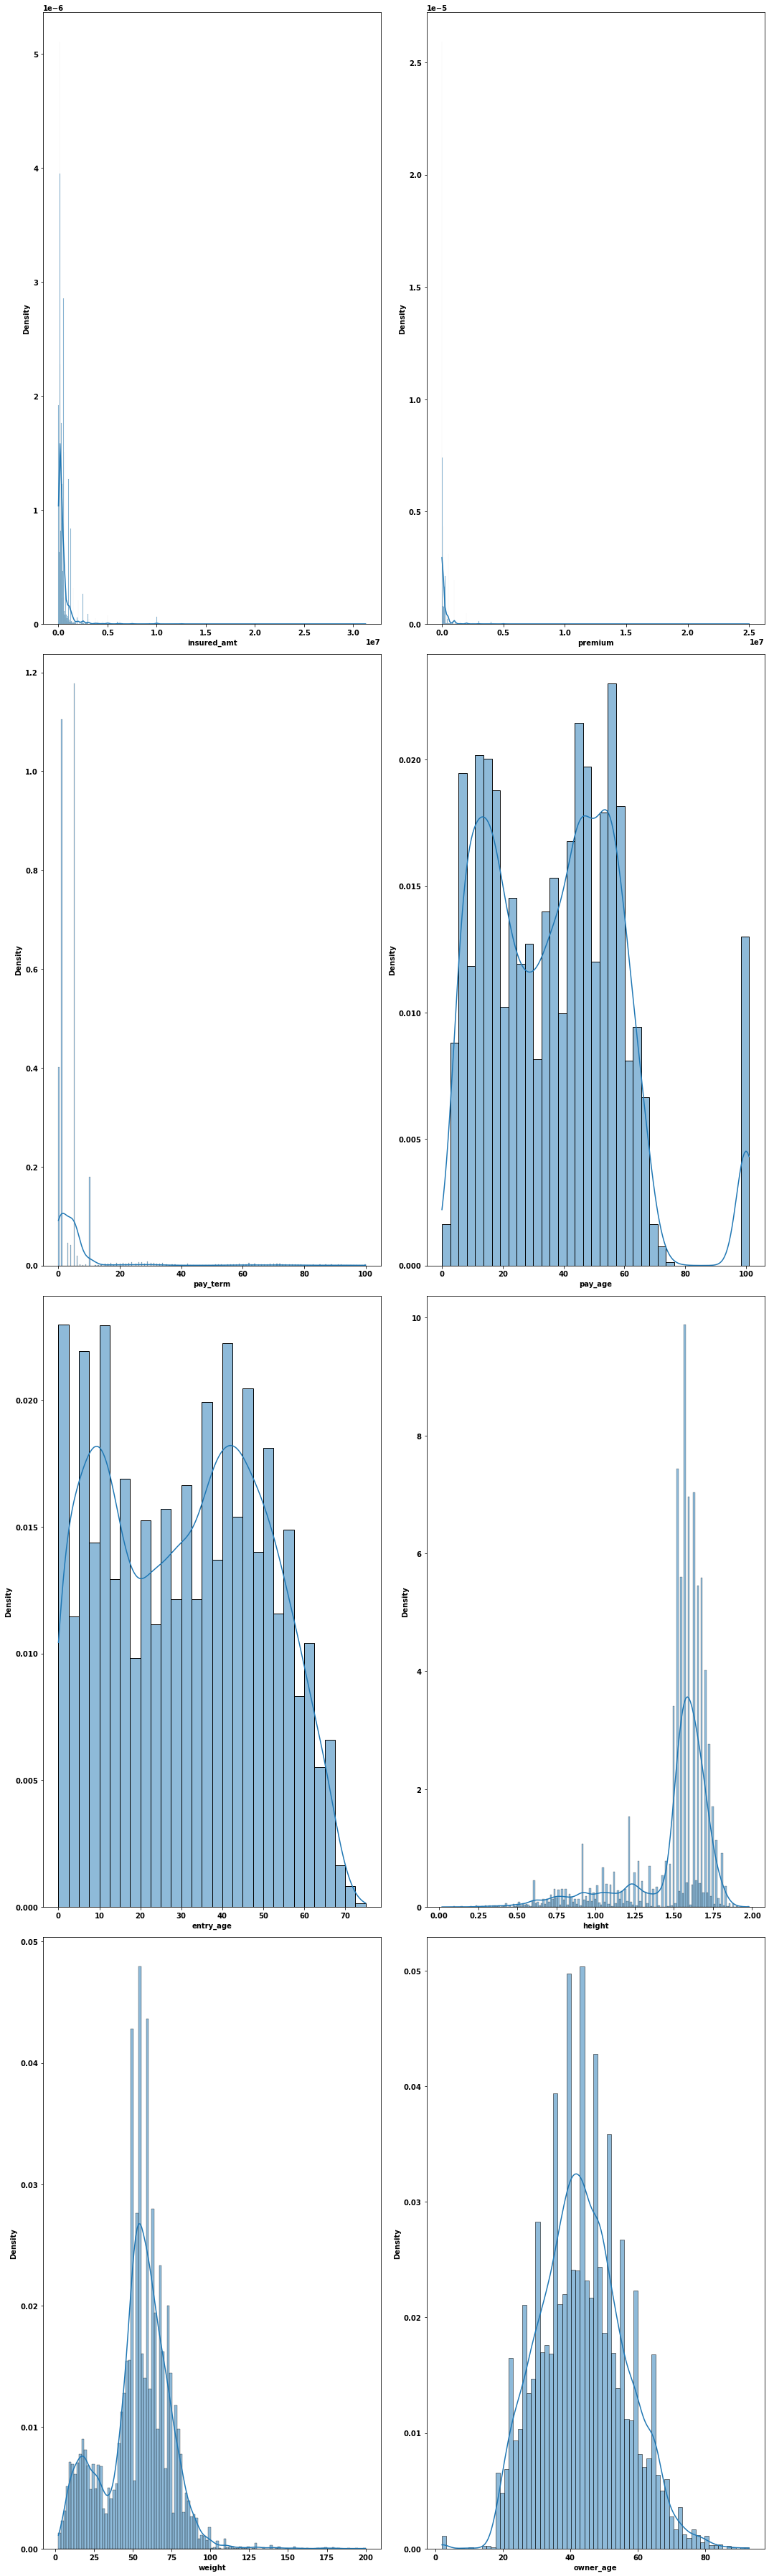

In [56]:
# plot overview distributions of numerical variables
# determining number of columns
ncols = 2
cols = num_data.columns

# determining number of rows
nrows = round(int(np.ceil(len(num_data.columns)) / (1.0*ncols)))

fig, axes = plt.subplots(nrows, ncols, figsize=(15,50))
axes = axes.ravel()

for col, ax in zip(cols, axes):
    sns.histplot(data=num_data[col], kde=True, stat='density', ax=ax)

plt.tight_layout();

Obviously, not normally distributed. And assuming money insured is in pesos, the assumption is that the amount is true as entered. 

**pay terms**

In [57]:
data['pay_term'].describe()

count    16722.000000
mean         6.333573
std         13.773752
min          0.000000
25%          1.000000
50%          5.000000
75%          5.000000
max        100.000000
Name: pay_term, dtype: float64

'0' would mean 0 premiums paid (there are zero-premium plans), but 100 would mean paying the premiums 100 times?

In [58]:
# 0 premiums
data[data['pay_term']==0][['pay_term','premium']]

,pay_term,premium
5,0.0,0.0
21,0.0,0.0
27,0.0,0.0
31,0.0,0.0
32,0.0,0.0
...,...,...
19946,0.0,0.0
19949,0.0,0.0
19950,0.0,0.0
19953,0.0,0.0


In [59]:
# paying premiums for 100 years at starting age of 100? 
data[data['pay_term']==100][['pay_term','premium','pay_method','pay_age']]

,pay_term,premium,pay_method,pay_age
12295,100.0,50000.0,Annual,100.0
12298,100.0,100000.0,Annual,100.0
12375,100.0,15000.0,Semi-Annual,100.0
12543,100.0,20000.0,Annual,100.0
12711,100.0,30000.0,Annual,100.0
12736,100.0,15000.0,Annual,100.0
13640,100.0,100000.0,Annual,100.0
14443,100.0,40000.0,Quarterly,100.0
14728,100.0,20000.0,Annual,100.0
15365,100.0,250000.0,Annual,100.0


In [60]:
# paying premiums at mean of 6 terms at a more realistic starting age.
data[data['pay_term']==6][['pay_term','premium','pay_method','pay_age']]

,pay_term,premium,pay_method,pay_age
117,6.0,3160.00,Quarterly,65.0
325,6.0,43288.00,Annual,17.0
326,6.0,788.00,Annual,17.0
2520,6.0,34440.50,Annual,28.0
2521,6.0,565.50,Annual,28.0
...,...,...,...,...
19261,6.0,2586.12,Semi-Annual,17.0
19530,6.0,790.00,Annual,65.0
19874,6.0,38831.88,Quarterly,22.0
19875,6.0,2532.00,Quarterly,22.0


**insured amounts**

In [61]:
data['insured_amt'].describe()

count    1.672200e+04
mean     4.766943e+05
std      9.636075e+05
min      5.000000e+02
25%      1.140653e+05
50%      2.500000e+05
75%      5.000000e+05
max      3.125000e+07
Name: insured_amt, dtype: float64

min insured is 500pesos, should be reasonable?

C:\Users\USER\anaconda3\envs\dsi24\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


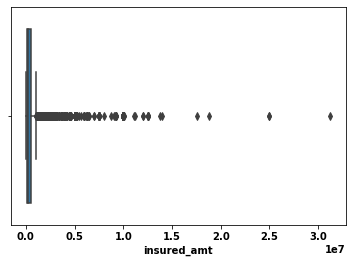

In [62]:
# check outliers
sns.boxplot(num_data['insured_amt']);

**premiums**

In [63]:
# permiums paid
data['premium'].describe()

count    1.672200e+04
mean     1.975546e+05
std      6.280945e+05
min      0.000000e+00
25%      9.641400e+02
50%      2.863858e+04
75%      2.000000e+05
max      2.500000e+07
Name: premium, dtype: float64

is it possible to pay 0 premium? will keep since some are unemployed, have multiple other policies, etc. 

In [64]:
data[data['premium'] == 0]

,policy_ref_dummy,issue_date,st_date,pol_st,product_category,prod_type,basic_cover_type,cover_type,insured_amt,premium,pay_term,pay_method,pay_mode,pay_age,life_to_be_covered_dummy,relationship,relationship_bin,entry_age,gender,occupation_class,height,weight,nationality_dummy,region_dummy,owner_age,owner_gender,class_order,serv_branch_dummy
5,POLID_54,2010-12-14,2010-12-13,inforce,Protection,NUL,LIVING BENEFIT,Rider,100000.00,0.0,0.0,Annual,Cash/Check,19.0,PART_ID_5553,DAUGHTER,CHILDREN,19,F,STUDENT,1.5240,45.359200,NATIONALITY_ID_1,REGION_10,50.0,F,10,SERV_BRANCH_600
21,POLID_2700,2011-05-30,2011-05-12,inforce,Protection,NUL,LIVING BENEFIT,Rider,1000000.00,0.0,0.0,Annual,Cash/Check,43.0,PART_ID_15801,SELF,SELF,43,M,BUSINESSMAN/ / BUSINESSWOMAN,1.7272,88.450440,NATIONALITY_ID_1,REGION_1,43.0,M,2,SERV_BRANCH_48
27,POLID_12696,2014-02-19,2016-02-15,inforce,Protection,NUL,LIVING BENEFIT,Rider,300000.00,0.0,0.0,Quarterly,Cash/Check,63.0,PART_ID_11580,SELF,SELF,63,F,PENSIONER,1.5494,45.812792,NATIONALITY_ID_1,REGION_14,63.0,F,1,SERV_BRANCH_568
31,POLID_2064,2011-02-28,2011-02-08,inforce,Protection,NUL,LIVING BENEFIT,Rider,389888.77,0.0,0.0,Quarterly,Auto-Debit Payment,14.0,PART_ID_14405,MOTHER,PARENTS,14,F,STUDENT,1.5748,52.163080,NATIONALITY_ID_1,REGION_3,48.0,F,2,SERV_BRANCH_217
32,POLID_2064,2011-02-28,2011-02-08,inforce,Protection,NUL,LIVING BENEFIT,Rider,400000.00,0.0,0.0,Quarterly,Auto-Debit Payment,14.0,PART_ID_14405,MOTHER,PARENTS,14,F,STUDENT,1.5748,52.163080,NATIONALITY_ID_1,REGION_3,48.0,F,2,SERV_BRANCH_217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19946,POLID_2703,2011-06-15,2011-06-10,inforce,Protection,NUL,LIVING BENEFIT,Rider,150000.00,0.0,0.0,Annual,Cash/Check,47.0,PART_ID_10902,SELF,SELF,47,F,BUSINESSMAN/ / BUSINESSWOMAN,1.5748,61.688512,NATIONALITY_ID_1,REGION_11,47.0,F,2,SERV_BRANCH_93
19949,POLID_4044,2011-07-11,2011-07-06,inforce,Savings,NUL,DEPOSIT FUND,Rider,241581.61,0.0,0.0,Annual,Cash/Check,23.0,PART_ID_10982,SELF,SELF,23,M,UNEMPLOYED,1.7018,68.038800,NATIONALITY_ID_1,REGION_11,23.0,M,7,SERV_BRANCH_187
19950,POLID_4044,2011-07-11,2011-07-06,inforce,Protection,NUL,LIVING BENEFIT,Rider,241581.61,0.0,0.0,Annual,Cash/Check,23.0,PART_ID_10982,SELF,SELF,23,M,UNEMPLOYED,1.7018,68.038800,NATIONALITY_ID_1,REGION_11,23.0,M,7,SERV_BRANCH_187
19953,POLID_2477,2011-07-15,2011-07-12,inforce,Protection,NUL,LIVING BENEFIT,Rider,100000.00,0.0,0.0,Annual,Cash/Check,26.0,PART_ID_10376,SELF,SELF,26,F,BANK,1.5494,49.895120,NATIONALITY_ID_1,REGION_11,26.0,F,10,SERV_BRANCH_475


**owner age**

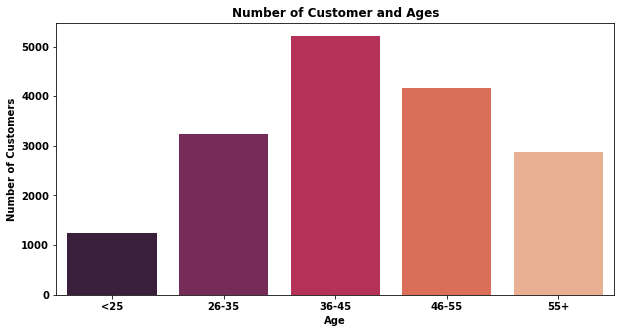

In [65]:
age18_25 = data['owner_age'][(data['owner_age'] <= 25)]
age26_35 = data['owner_age'][(data['owner_age'] <= 35) & (data['owner_age'] >= 26)]
age36_45 = data['owner_age'][(data['owner_age'] <= 45) & (data['owner_age'] >= 36)]
age46_55 = data['owner_age'][(data['owner_age'] <= 55) & (data['owner_age'] >= 46)]
age55above = data['owner_age'][data['owner_age'] >= 56]

x = ["<25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(10,5))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

Most policy owners are between 36-45. 

**Calculate ANP**

In [66]:
# how much each owner paid
data['pay_method'].unique()

array(['Annual', 'Single Pay', 'Semi-Annual', 'Quarterly', 'Monthly'],
      dtype=object)

In [67]:
def calc_ANP(row):
    if row['pay_method'] == 'Annual':
        row['ANP'] = row['premium'] * 1
    elif row['pay_method'] == 'Single Pay':
        row['ANP'] = row['premium'] / 10
    elif row['pay_method'] == 'Semi-Annual':
        row['ANP'] = row['premium'] * 2 
    elif row['pay_method'] == 'Quarterly':
        row['ANP'] = row['premium'] * 4
    elif row['pay_method'] == 'Monthly':
        row['ANP'] = row['premium'] * 12  
    return row

In [68]:
data = data.apply(calc_ANP, axis=1)

In [69]:
num_data['ANP'] = data['ANP']

In [70]:
num_data.head()

,insured_amt,premium,pay_term,pay_age,entry_age,height,weight,owner_age,class_order,ANP
1,500000.0,161515.0,5.0,58.0,53,1.5748,54.00000,53.0,4,161515.0
3,100000.0,26745.0,5.0,24.0,19,1.5240,45.35920,50.0,10,26745.0
4,100000.0,443.0,5.0,24.0,19,1.5240,45.35920,50.0,10,443.0
5,100000.0,0.0,0.0,19.0,19,1.5240,45.35920,50.0,10,0.0
7,552125.0,441700.0,1.0,62.0,61,1.5240,63.50288,61.0,3,44170.0


C:\Users\USER\anaconda3\envs\dsi24\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


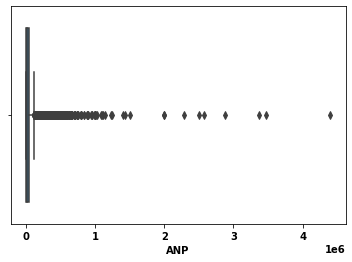

In [71]:
# check outliers , wide range of amounts insured.
sns.boxplot(num_data['ANP']);

**Calculate BMI (not owner)**

In [72]:
# convert weight and height to bmi
data['bmi'] = data['weight']/(data['height']**2)

In [73]:
data['bmi'].describe()

count     16722.000000
mean         36.526978
std        1705.877422
min           1.406571
25%          19.387518
50%          22.217061
75%          25.087886
max      220580.511887
Name: bmi, dtype: float64

In [74]:
# something wrong with bmi. >30 is obese, but >100000 is not possible. 
# baby's bmi also different. 
data[data['bmi'] > 1000]

,policy_ref_dummy,issue_date,st_date,pol_st,product_category,prod_type,basic_cover_type,cover_type,insured_amt,premium,pay_term,pay_method,pay_mode,pay_age,life_to_be_covered_dummy,relationship,relationship_bin,entry_age,gender,occupation_class,height,weight,nationality_dummy,region_dummy,owner_age,owner_gender,class_order,serv_branch_dummy,ANP,bmi
6045,POLID_803,2011-03-31,2014-11-11,inforce,Retirement,NUL,ANTICIPATED ENDOWMENT,Basic,89085.84,22000.00,5.0,Quarterly,Cash/Check,6.0,PART_ID_4116,GRANDMOTHER,GRANDPARENTS,1,M,JUVENILE,0.0700,10.0,NATIONALITY_ID_1,REGION_13,59.0,F,2,SERV_BRANCH_393,88000.00,2040.816327
7866,POLID_11671,2011-09-27,2011-09-28,inforce,Investment,UL,UNIT LINK,Basic,312500.00,250000.00,1.0,Single Pay,Cash/Check,62.0,PART_ID_10909,SELF,SELF,61,F,"TEACHER, LECTURER, TUTOR, PROFESSOR",0.0169,63.0,NATIONALITY_ID_1,REGION_11,61.0,F,3,SERV_BRANCH_203,25000.00,220580.511887
8754,POLID_1212,2012-01-17,2012-01-13,inforce,Retirement,NUL,ANTICIPATED ENDOWMENT,Basic,115495.25,30000.00,5.0,Annual,Cash/Check,7.0,PART_ID_5023,MOTHER,PARENTS,2,F,JUVENILE,0.0900,13.0,NATIONALITY_ID_1,REGION_10,36.0,F,2,SERV_BRANCH_26,30000.00,1604.938272
8755,POLID_1212,2012-01-17,2012-01-13,inforce,Protection,NUL,PAYOR'S BENEFIT,Rider,29702.97,297.03,5.0,Annual,Cash/Check,7.0,PART_ID_5023,MOTHER,PARENTS,2,F,JUVENILE,0.0900,13.0,NATIONALITY_ID_1,REGION_10,36.0,F,2,SERV_BRANCH_26,297.03,1604.938272
9594,POLID_2205,2012-04-11,2016-03-18,surrendered,Retirement,NUL,ANTICIPATED ENDOWMENT,Basic,250000.00,70784.60,5.0,Quarterly,Cash/Check,8.0,PART_ID_7066,MOTHER,PARENTS,3,F,JUVENILE,0.0940,15.0,NATIONALITY_ID_1,REGION_12,28.0,F,6,SERV_BRANCH_138,283138.40,1697.600724
9595,POLID_2205,2012-04-11,2016-03-18,surrendered,Protection,NUL,PAYOR'S BENEFIT,Rider,63712.50,2548.52,5.0,Quarterly,Cash/Check,8.0,PART_ID_7066,MOTHER,PARENTS,3,F,JUVENILE,0.0940,15.0,NATIONALITY_ID_1,REGION_12,28.0,F,6,SERV_BRANCH_138,10194.08,1697.600724


obvious mistake during data entry. not going to bother changing it. will be removed later with the others.

In [75]:
data[data['bmi'] > 80][['weight','height','bmi','entry_age']].head(50)

,weight,height,bmi,entry_age
718,83.914520,1.0160,81.292354,29
1019,80.000000,0.7500,142.222222,33
1020,80.000000,0.7500,142.222222,33
1532,23.000000,0.4700,104.119511,6
1533,23.000000,0.4700,104.119511,6
1534,23.000000,0.4700,104.119511,6
1535,23.000000,0.4700,104.119511,6
2915,38.555320,0.5000,154.221280,6
2916,38.555320,0.5000,154.221280,6
2917,38.555320,0.5000,154.221280,6


strange bmi data. remove >80. there is a high possibility there are very obese people (bmi>50), but babies weighing 80 kg is strange, and bmi not recommended for kids <2 yrs. 

In [76]:
data = data[data['bmi']<80]

In [77]:
data['bmi'].describe()

count    16671.000000
mean        22.521136
std          5.317943
min          1.406571
25%         19.375039
50%         22.193046
75%         25.059265
max         73.194591
Name: bmi, dtype: float64

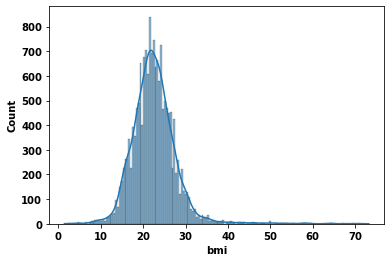

In [78]:
# data['bmi']
sns.histplot(data=data, x='bmi', kde=True);

bmi now makes more sense, and looks like a nice normal distribution.


**Convert datetime**

In [79]:
date_data = data.select_dtypes(include=['datetime']).copy()

In [80]:
date_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16671 entries, 1 to 19959
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   issue_date  16671 non-null  datetime64[ns]
 1   st_date     16671 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 390.7 KB


In [81]:
date_data.head(20)

,issue_date,st_date
1,2011-06-15,2011-06-08
3,2010-12-14,2010-12-13
4,2010-12-14,2010-12-13
5,2010-12-14,2010-12-13
7,2013-11-05,2013-11-06
8,2013-07-31,2013-08-01
9,2011-09-27,2011-09-28
10,2012-05-08,2012-05-09
11,2011-09-27,2011-09-28
12,2015-10-15,2015-10-02


obviously, 'st_date' happened earlier than 'issue_date'. think 'issue_date' is more important than 'st_date' since that was when the policy was issued. do not really need the 'day', so 'month' and 'year' should be the same either way.

In [82]:
# split date to week, month, year
data['week'] = data['issue_date'].dt.week
data['month'] = data['issue_date'].dt.month
data['year'] = data['issue_date'].dt.year

<ipython-input-82-cb5c264a5a04>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data['week'] = data['issue_date'].dt.week


In [83]:
data.head(10)

,policy_ref_dummy,issue_date,st_date,pol_st,product_category,prod_type,basic_cover_type,cover_type,insured_amt,premium,pay_term,pay_method,pay_mode,pay_age,life_to_be_covered_dummy,relationship,relationship_bin,entry_age,gender,occupation_class,height,weight,nationality_dummy,region_dummy,owner_age,owner_gender,class_order,serv_branch_dummy,ANP,bmi,week,month,year
1,POLID_3215,2011-06-15,2011-06-08,inforce,Retirement,NUL,ANTICIPATED ENDOWMENT,Basic,500000.00,161515.0,5.0,Annual,Cash/Check,58.0,PART_ID_8104,SELF,SELF,53,F,"HOSPITAL, NURSING HOME, CLINIC, ASSYLUM",1.5748,54.00000,NATIONALITY_ID_1,REGION_2,53.0,F,4,SERV_BRANCH_452,161515.0,21.774237,24,6,2011
3,POLID_54,2010-12-14,2010-12-13,inforce,Retirement,NUL,ANTICIPATED ENDOWMENT,Basic,100000.00,26745.0,5.0,Annual,Cash/Check,24.0,PART_ID_5553,DAUGHTER,CHILDREN,19,F,STUDENT,1.5240,45.35920,NATIONALITY_ID_1,REGION_10,50.0,F,10,SERV_BRANCH_600,26745.0,19.529695,50,12,2010
4,POLID_54,2010-12-14,2010-12-13,inforce,Protection,NUL,ACC DEATH & DISMEMBERMENT,Rider,100000.00,443.0,5.0,Annual,Cash/Check,24.0,PART_ID_5553,DAUGHTER,CHILDREN,19,F,STUDENT,1.5240,45.35920,NATIONALITY_ID_1,REGION_10,50.0,F,10,SERV_BRANCH_600,443.0,19.529695,50,12,2010
5,POLID_54,2010-12-14,2010-12-13,inforce,Protection,NUL,LIVING BENEFIT,Rider,100000.00,0.0,0.0,Annual,Cash/Check,19.0,PART_ID_5553,DAUGHTER,CHILDREN,19,F,STUDENT,1.5240,45.35920,NATIONALITY_ID_1,REGION_10,50.0,F,10,SERV_BRANCH_600,0.0,19.529695,50,12,2010
7,POLID_9796,2013-11-05,2013-11-06,inforce,Investment,UL,UNIT LINK,Basic,552125.00,441700.0,1.0,Single Pay,Cash/Check,62.0,PART_ID_5084,SELF,SELF,61,F,"LAWYER, ATTORNEY",1.5240,63.50288,NATIONALITY_ID_1,REGION_10,61.0,F,3,SERV_BRANCH_252,44170.0,27.341572,45,11,2013
8,POLID_9803,2013-07-31,2013-08-01,inforce,Investment,UL,UNIT LINK,Basic,375000.00,300000.0,1.0,Single Pay,Cash/Check,61.0,PART_ID_5084,SELF,SELF,60,F,"LAWYER,ATTORNEY",1.5240,63.50288,NATIONALITY_ID_1,REGION_10,60.0,F,3,SERV_BRANCH_252,30000.0,27.341572,31,7,2013
9,POLID_8286,2011-09-27,2011-09-28,inforce,Investment,UL,UNIT LINK,Basic,1500000.00,1000000.0,1.0,Single Pay,Cash/Check,35.0,PART_ID_11671,SELF,SELF,34,F,BUSINESSMAN/ / BUSINESSWOMAN,1.6500,50.00000,NATIONALITY_ID_1,REGION_14,34.0,F,2,SERV_BRANCH_314,100000.0,18.365473,39,9,2011
10,POLID_4860,2012-05-08,2012-05-09,inforce,Protection,UL,TERM LIFE,Basic,312500.00,250000.0,1.0,Single Pay,Cash/Check,43.0,PART_ID_7097,SELF,SELF,42,F,BUSINESSMAN/ / BUSINESSWOMAN,1.4986,49.89512,NATIONALITY_ID_1,REGION_12,42.0,F,2,SERV_BRANCH_132,25000.0,22.217061,19,5,2012
11,POLID_8348,2011-09-27,2011-09-28,inforce,Investment,UL,UNIT LINK,Basic,312500.00,250000.0,1.0,Single Pay,Cash/Check,57.0,PART_ID_13535,SELF,SELF,56,M,BUSINESSMAN/ / BUSINESSWOMAN,1.7272,74.84268,NATIONALITY_ID_1,REGION_3,56.0,M,2,SERV_BRANCH_198,25000.0,25.087886,39,9,2011
12,POLID_3017,2015-10-15,2015-10-02,inforce,Retirement,NUL,ANTICIPATED ENDOWMENT,Basic,379738.37,50000.0,10.0,Annual,Cash/Check,38.0,PART_ID_10102,SELF,SELF,28,F,BUSINESSMAN/ / BUSINESSWOMAN,1.5748,49.89512,NATIONALITY_ID_1,REGION_15,28.0,F,2,SERV_BRANCH_70,50000.0,20.119040,42,10,2015


#### categorical data

In [84]:
cat_data = data.select_dtypes(include=['object']).copy()

In [85]:
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16671 entries, 1 to 19959
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   policy_ref_dummy          16671 non-null  object
 1   pol_st                    16671 non-null  object
 2   product_category          16671 non-null  object
 3   prod_type                 16671 non-null  object
 4   basic_cover_type          16671 non-null  object
 5   cover_type                16671 non-null  object
 6   pay_method                16671 non-null  object
 7   pay_mode                  16671 non-null  object
 8   life_to_be_covered_dummy  16671 non-null  object
 9   relationship              16671 non-null  object
 10  relationship_bin          16671 non-null  object
 11  gender                    16671 non-null  object
 12  occupation_class          16671 non-null  object
 13  nationality_dummy         16671 non-null  object
 14  region_dummy          

'policy_ref' and 'serv_branch' not useful features. For 'serv_branch', the 'region' where it was grouped, is probably more useful.

**policy status**

In [86]:
data['pol_st'].value_counts(normalize=True)

inforce        0.815128
lapsed         0.131546
surrendered    0.049067
claimed        0.004259
Name: pol_st, dtype: float64

81.5% of the policies are still inforce.

**product category and type**

In [87]:
data['product_category'].unique()

array(['Retirement', 'Protection', 'Investment', 'Savings', 'Health'],
      dtype=object)

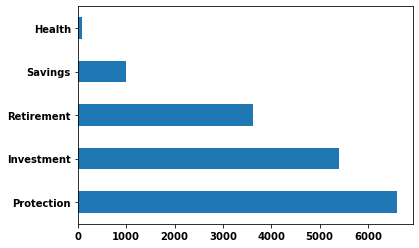

In [88]:
data['product_category'].value_counts().plot(kind='barh');

In [89]:
data['prod_type'].value_counts()

NUL    10742
UL      5929
Name: prod_type, dtype: int64

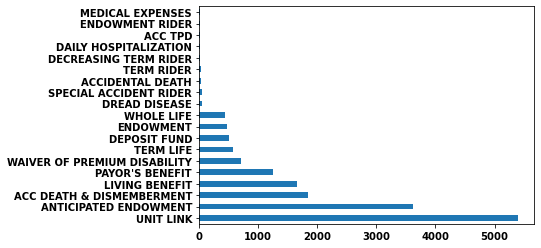

In [90]:
data['basic_cover_type'].value_counts().plot(kind='barh');

In [91]:
data['cover_type'].value_counts()

Basic    10489
Rider     6182
Name: cover_type, dtype: int64

**pay mode**

In [92]:
data['pay_mode'].value_counts(normalize=True)

Cash/Check             0.947394
Auto-Debit Payment     0.031792
Salary Deduction       0.014336
Credit Card Payment    0.006478
Name: pay_mode, dtype: float64

Payment by cash/check is predominant in this feature, so not very useful.

**gender**

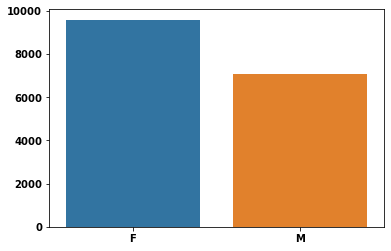

In [93]:
genders_cover = data['gender'].value_counts()
sns.barplot(x=genders_cover.index,y=genders_cover.values);

Most lives covered are female.

**owner gender**

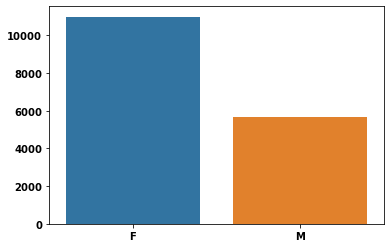

In [94]:
genders = data['owner_gender'].value_counts()
sns.barplot(x=genders.index,y=genders.values);

Most policy owners are male.

In [95]:
data['life_to_be_covered_dummy'].unique()

array(['PART_ID_8104', 'PART_ID_5553', 'PART_ID_5084', ...,
       'PART_ID_10376', 'PART_ID_11254', 'PART_ID_11337'], dtype=object)

In [96]:
data['relationship'].value_counts()

SELF             10134
MOTHER            3751
FATHER            1557
GRANDMOTHER        342
AUNT               151
DAUGHTER           113
SON                104
GRANDFATHER         94
EMPLOYER            75
WIFE                71
HUSBAND             70
SISTER              41
PARENT              33
BROTHER             27
UNCLE               21
SPOUSE              15
NIECE               14
NEPHEW              11
GRANDSON            11
GRANDDAUGHTER        8
STEPFATHER           5
CHILD                5
GODMOTHER            4
MOTHER-IN-LAW        3
COUSIN               3
GUARDIAN             2
OTHERS               2
GRAND-AUNT           1
ADOPTED CHILD        1
STEPMOTHER           1
MISSING              1
Name: relationship, dtype: int64

In [97]:
data['relationship_bin'].value_counts()

SELF             10134
PARENTS           5356
GRANDPARENTS       436
CHILDREN           223
RELATIVE           201
SPOUSE             156
EMPLOYER            75
SIBLINGS            68
GRANDCHILDREN       19
OTHERS               2
MISSING              1
Name: relationship_bin, dtype: int64

**region and nationality**

In [98]:
data['nationality_dummy'].value_counts(normalize=True)

NATIONALITY_ID_1     0.982245
NATIONALITY_ID_4     0.006718
NATIONALITY_ID_6     0.003119
NATIONALITY_ID_3     0.001979
NATIONALITY_ID_7     0.000840
NATIONALITY_ID_9     0.000600
NATIONALITY_ID_5     0.000540
NATIONALITY_ID_21    0.000480
NATIONALITY_ID_13    0.000360
NATIONALITY_ID_17    0.000300
NATIONALITY_ID_16    0.000300
NATIONALITY_ID_15    0.000300
NATIONALITY_ID_22    0.000240
NATIONALITY_ID_11    0.000240
NATIONALITY_ID_20    0.000240
NATIONALITY_ID_34    0.000180
NATIONALITY_ID_31    0.000180
NATIONALITY_ID_24    0.000180
NATIONALITY_ID_18    0.000120
NATIONALITY_ID_35    0.000120
NATIONALITY_ID_28    0.000120
NATIONALITY_ID_26    0.000060
NATIONALITY_ID_25    0.000060
NATIONALITY_ID_10    0.000060
NATIONALITY_ID_29    0.000060
NATIONALITY_ID_30    0.000060
NATIONALITY_ID_19    0.000060
NATIONALITY_ID_27    0.000060
NATIONALITY_ID_14    0.000060
NATIONALITY_ID_23    0.000060
NATIONALITY_ID_12    0.000060
Name: nationality_dummy, dtype: float64

ID_1 dominates nationality, so not useful. 

In [99]:
data['region_dummy'].value_counts(normalize=True)

REGION_10    0.177734
REGION_14    0.145342
REGION_3     0.122548
REGION_2     0.099994
REGION_1     0.095975
REGION_11    0.092976
REGION_12    0.086677
REGION_8     0.076720
REGION_13    0.064603
REGION_15    0.032032
REGION_4     0.001740
REGION_18    0.001440
REGION_23    0.001260
REGION_22    0.000360
REGION_16    0.000180
REGION_5     0.000180
REGION_6     0.000120
REGION_19    0.000060
REGION_20    0.000060
Name: region_dummy, dtype: float64

Might prove more useful than 'nationality'

### Export data to csv

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16671 entries, 1 to 19959
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   policy_ref_dummy          16671 non-null  object        
 1   issue_date                16671 non-null  datetime64[ns]
 2   st_date                   16671 non-null  datetime64[ns]
 3   pol_st                    16671 non-null  object        
 4   product_category          16671 non-null  object        
 5   prod_type                 16671 non-null  object        
 6   basic_cover_type          16671 non-null  object        
 7   cover_type                16671 non-null  object        
 8   insured_amt               16671 non-null  float64       
 9   premium                   16671 non-null  float64       
 10  pay_term                  16671 non-null  float64       
 11  pay_method                16671 non-null  object        
 12  pay_mode          

In [101]:
data.to_csv('ins_data.csv')

**product category by year**

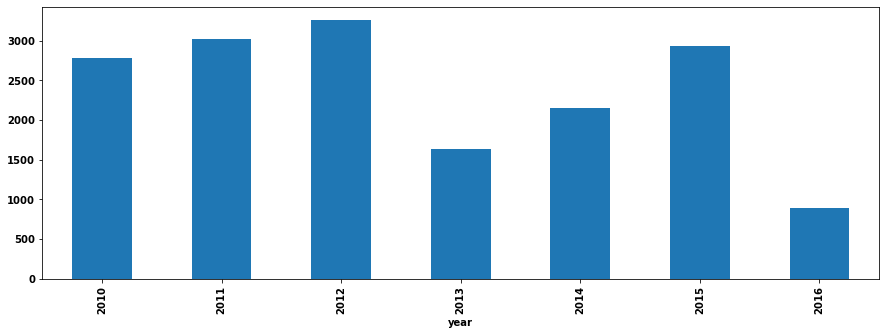

In [116]:
year_groups = data.groupby([data['year']])['product_category'].count()
year_groups.plot(kind='bar',figsize=(15,5),legend=None);

In [117]:
# # is product category important? sum by year. 
# total_y = data.groupby('year')['product_category'].count().reset_index()

In [118]:
# total_y

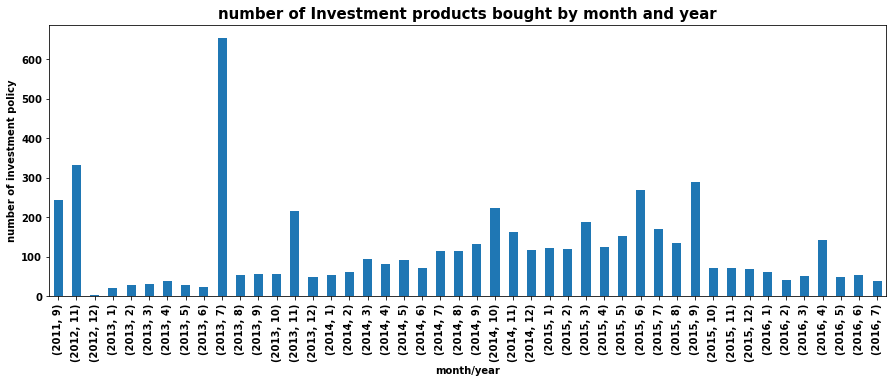

In [119]:
data[data['product_category'] == 'Investment'][['month','year']].groupby(['year','month']).size().plot(kind='bar',figsize=(15,5));
plt.xlabel('month/year',fontsize=10);
plt.xticks(rotation='90',fontsize=10);
plt.ylabel('number of investment policy',fontsize=10)
plt.title('number of Investment products bought by month and year',fontsize=15); 

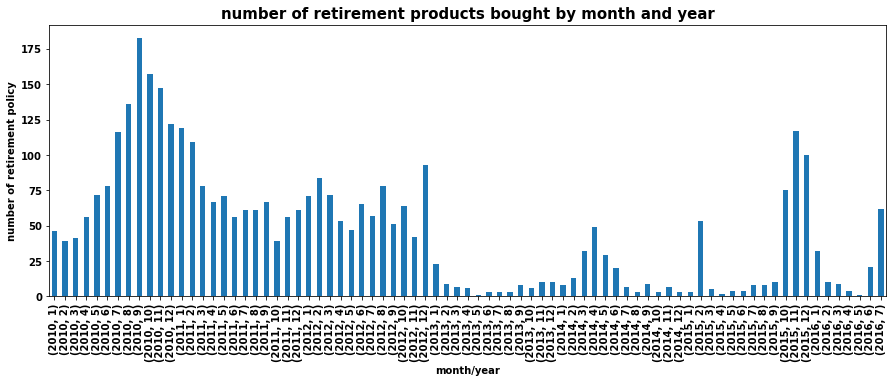

In [120]:
data[data['product_category'] == 'Retirement'][['month','year']].groupby(['year','month']).size().plot(kind='bar',figsize=(15,5));
plt.xlabel('month/year',fontsize=10);
plt.xticks(rotation='90',fontsize=10);
plt.ylabel('number of retirement policy',fontsize=10)
plt.title('number of retirement products bought by month and year',fontsize=15); 

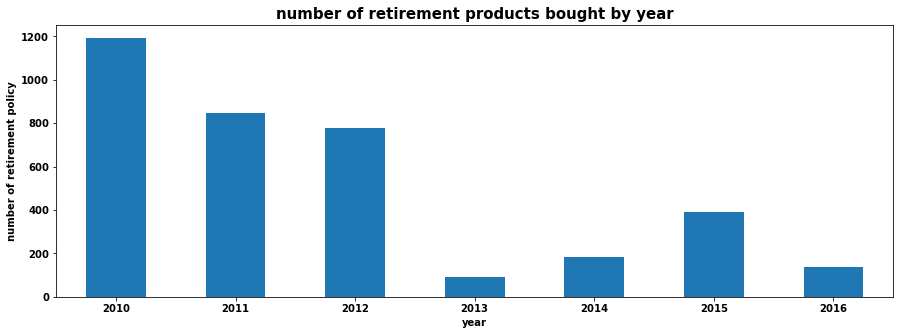

In [121]:
data[(data['product_category'] == 'Retirement')][['year']].groupby(['year']).size().plot(kind='bar',figsize=(15,5));
plt.xlabel('year',fontsize=10);
plt.xticks(rotation='horizontal',fontsize=10);
plt.ylabel('number of retirement policy',fontsize=10)
plt.title('number of retirement products bought by year',fontsize=15); 

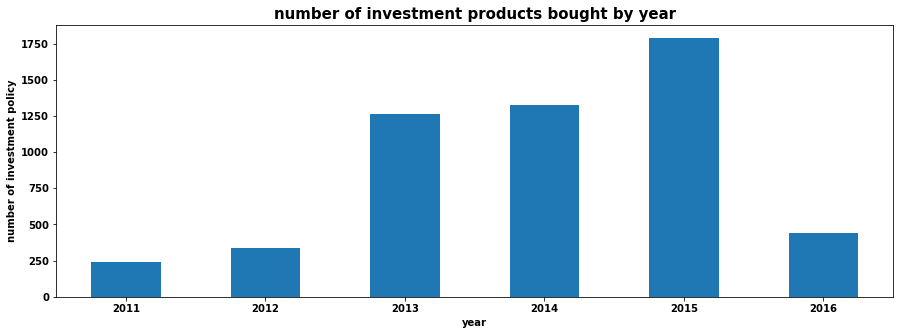

In [122]:
data[(data['product_category'] == 'Investment')][['year']].groupby(['year']).size().plot(kind='bar',figsize=(15,5));
plt.xlabel('year',fontsize=10);
plt.xticks(rotation='horizontal',fontsize=10);
plt.ylabel('number of investment policy',fontsize=10)
plt.title('number of investment products bought by year',fontsize=15); 

In [123]:
data[data['product_category'] == 'Health'][['basic_cover_type']].value_counts()

basic_cover_type     
DREAD DISEASE            57
DAILY HOSPITALIZATION    10
MEDICAL EXPENSES         10
dtype: int64

In [124]:
data[data['product_category'] == 'Investment'][['basic_cover_type']].value_counts()

basic_cover_type
UNIT LINK           5395
dtype: int64

In [125]:
data[data['product_category'] == 'Protection'][['basic_cover_type']].value_counts()

basic_cover_type            
ACC DEATH & DISMEMBERMENT       1851
LIVING BENEFIT                  1651
PAYOR'S BENEFIT                 1247
WAIVER OF PREMIUM DISABILITY     711
TERM LIFE                        575
WHOLE LIFE                       436
SPECIAL ACCIDENT RIDER            48
ACCIDENTAL DEATH                  30
TERM RIDER                        28
DECREASING TERM RIDER             11
ACC TPD                           10
dtype: int64

In [126]:
data[data['product_category'] == 'Retirement'][['basic_cover_type']].value_counts()

basic_cover_type     
ANTICIPATED ENDOWMENT    3615
dtype: int64

In [127]:
data[data['product_category'] == 'Savings'][['basic_cover_type']].value_counts()

basic_cover_type
DEPOSIT FUND        508
ENDOWMENT           468
ENDOWMENT RIDER      10
dtype: int64

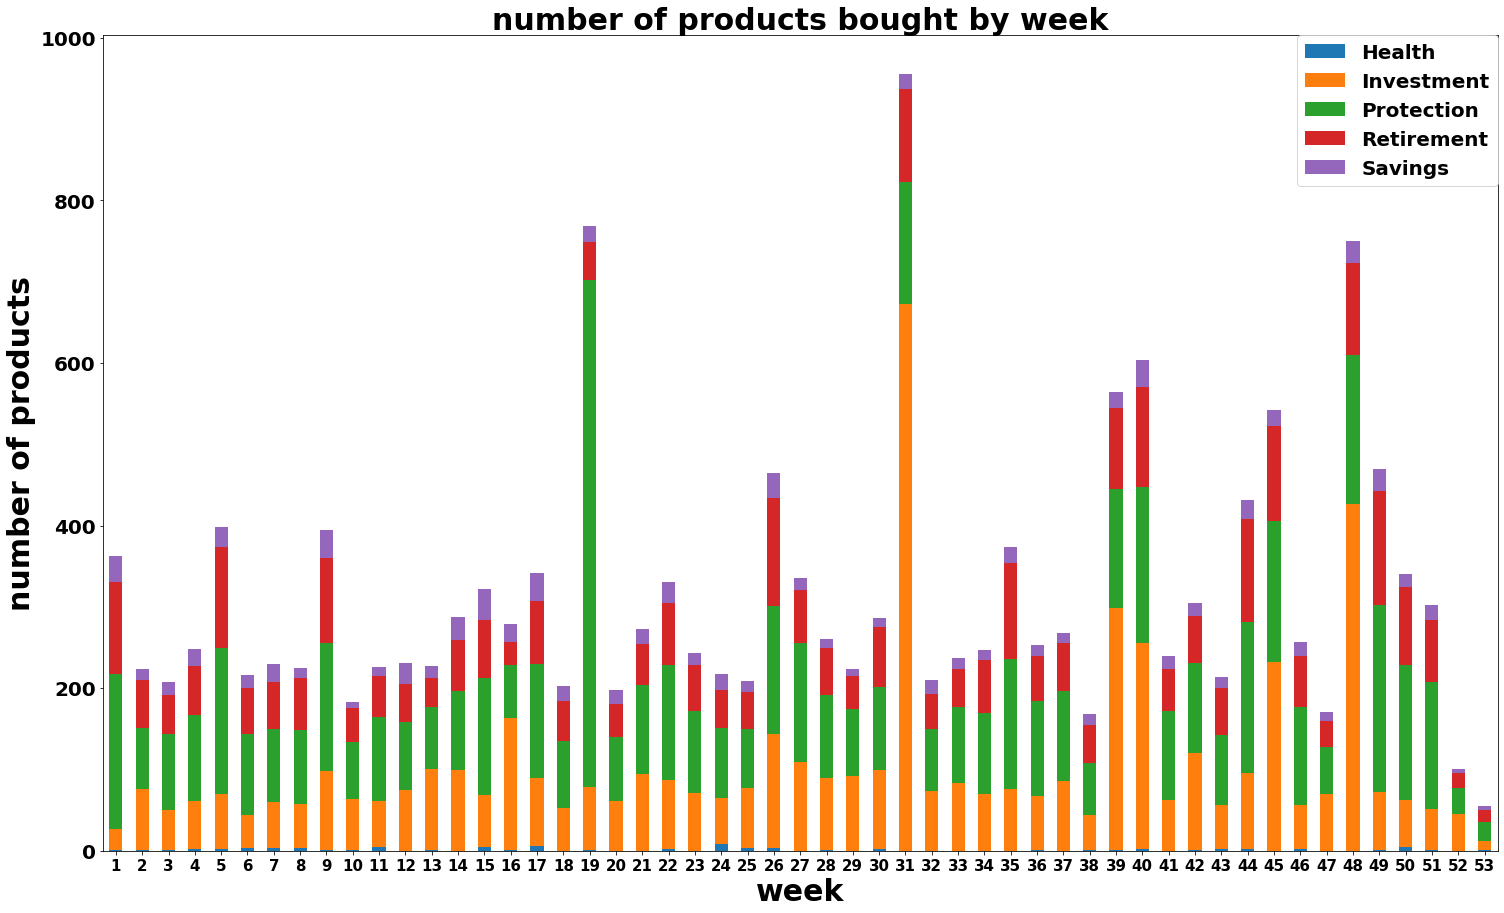

In [128]:
df_week = pd.pivot_table(data[['week','product_category','ANP']], index='week', columns='product_category', values = 'ANP' , aggfunc='count')
df_week.plot.bar(stacked=True, figsize=(25,15));
plt.legend(bbox_to_anchor=(1,1),loc='upper right',borderaxespad=0,fontsize=20);
plt.xlabel('week',fontsize=30)
plt.xticks(rotation='horizontal',fontsize=15)
plt.ylabel('number of products',fontsize=30);
plt.yticks(fontsize=20)
plt.title('number of products bought by week',fontsize=30); 

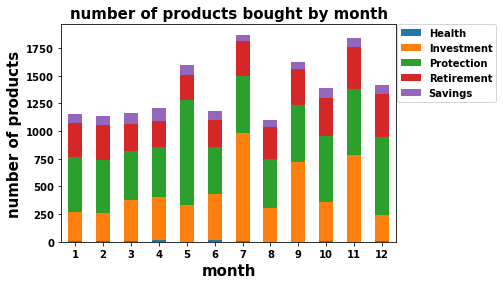

In [129]:
df_month = pd.pivot_table(data[['month','product_category','ANP']], index='month', columns='product_category', values = 'ANP' , aggfunc='count')
df_month.plot.bar(stacked=True);
plt.legend(bbox_to_anchor=(1.3,1),loc='upper right',borderaxespad=0);
plt.xlabel('month',fontsize=15)
plt.xticks(rotation='horizontal',fontsize=10)
plt.ylabel('number of products',fontsize=15);
plt.yticks(fontsize=10)
plt.title('number of products bought by month',fontsize=15);

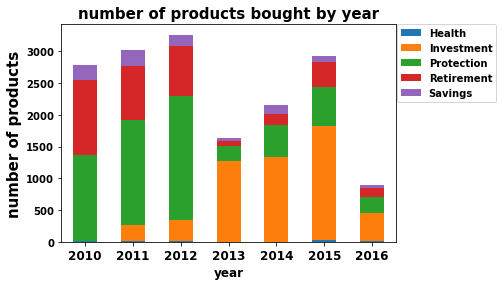

In [130]:
df_year = pd.pivot_table(data[['year','product_category','ANP']], index='year', columns='product_category', values = 'ANP' , aggfunc='count')
df_year.plot.bar(stacked=True);
plt.legend(bbox_to_anchor=(1.3,1),loc='upper right',borderaxespad=0);
plt.xlabel('year',fontsize=12)
plt.xticks(rotation='horizontal',fontsize=12)
plt.ylabel('number of products',fontsize=15);
plt.yticks(fontsize=10)
plt.title('number of products bought by year',fontsize=15);

In [131]:
# # double checking 
# data[(data['product_category'] == 'Retirement')  & (data['year'] == 2016)]

In [132]:
# # double checking 
# data[data['product_category'] == 'Health'].groupby('year').count()

In [133]:
# is product category important? sum by year. 
health_yANP = data[data['product_num']==0].groupby('year')['ANP'].sum().reset_index()
investment_yANP = data[data['product_num']==1].groupby('year')['ANP'].sum().reset_index()
protection_yANP = data[data['product_num']==2].groupby('year')['ANP'].sum().reset_index()
retirement_yANP = data[data['product_num']==3].groupby('year')['ANP'].sum().reset_index()
savings_yANP = data[data['product_num']==4].groupby('year')['ANP'].sum().reset_index()

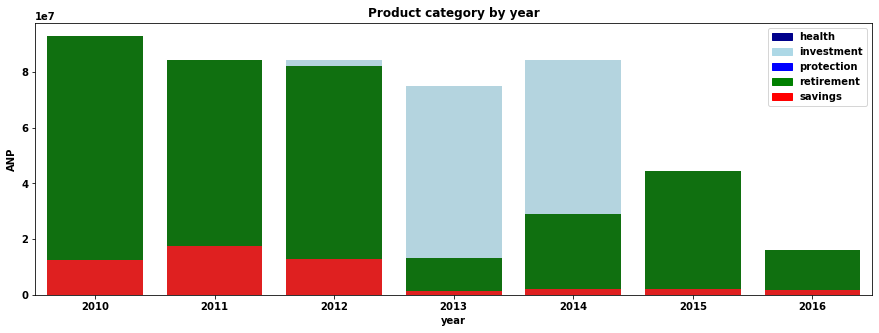

In [134]:
plt.figure(figsize=(15,5))
bar0 = sns.barplot(x='year',y='ANP',data=health_yANP, color='darkblue');
bar1 = sns.barplot(x='year',y='ANP',data=investment_yANP, color='lightblue');
bar2 = sns.barplot(x='year',y='ANP',data=protection_yANP, color='blue');
bar3 = sns.barplot(x='year',y='ANP',data=retirement_yANP, color='green');
bar4 = sns.barplot(x='year',y='ANP',data=savings_yANP, color='red');

# add legend
bar_0 = mpatches.Patch(color='darkblue', label='health')
bar_1 = mpatches.Patch(color='lightblue', label='investment')
bar_2 = mpatches.Patch(color='blue', label='protection')
bar_3 = mpatches.Patch(color='green', label='retirement')
bar_4 = mpatches.Patch(color='red', label='savings')
plt.legend(handles=[bar_0,bar_1,bar_2,bar_3,bar_4]);
plt.title('Product category by year')
plt.show()

Most ANP can be earned from Investment policies and Retirement policies.

### Customer segmentation

A new customer wants to buy life insurance. He comes into the firm and fills in basic demographic information about himself, such as age, gender and employment status, retirement plans, homeownership status, vehicle ownership and behavioural data (questions about the lifestyle of the individual). 

KMeans algorithm addresses the problem linked to how to classify the new customer in terms of what segment does he belong to. Once he can be classified then the KMeans algorithm will also help estimate how much the yearly/monthly premiums should be. 

In [135]:
# possible owner features of interest
# 'bmi'
# 'nationality_dummy'
# 'region_dummy'
# 'owner_age'
# 'owner_gender'
# 'class_order'
# 'relationship_bin'
# 'ANP'

**owner_gender**

In [136]:
data['owner_gender'].unique()

array(['F', 'M'], dtype=object)

In [137]:
# convert gender to numerical
data['owner_gender']=data['owner_gender'].apply(lambda x: 1 if x=='M' else 0)

**occupation_class**

In [138]:
data['occupation_class'].unique()

array(['HOSPITAL, NURSING HOME, CLINIC, ASSYLUM', 'STUDENT',
       'LAWYER, ATTORNEY', 'LAWYER,ATTORNEY',
       'BUSINESSMAN/ / BUSINESSWOMAN', 'BANK', 'PENSIONER',
       'OFFICE WORKER', 'ENGINEER', 'UNEMPLOYED', 'HOUSEWIFE',
       'AGRICULTURE', 'ACCOUNTANT', 'DENTAL', 'OPTICIAN/OPTOMETRIST',
       'TEACHER, LECTURER, TUTOR, PROFESSOR', 'MARINE INDUSTRY',
       'JUVENILE', 'PRINTING & PUBLISHING',
       'HOSPITAL,NURSING HOME,CLINIC,ASSYLUM', 'SEAMAN / SEAFARER',
       'OVERSEAS CONTRACT WORKER (OCW)', 'COMPUTER INDUSTRY',
       'SALESPERSON', 'VETERINARY PRACTICE', 'DECORATOR, INTERIOR',
       'FASHION DESIGNER', 'RELIGIOUS GROUP',
       'BUSINESS MACHINES SALES & SERVICES', 'POLICE', 'SECURITY GUARD',
       'CASHIER', 'COLLECTOR', 'MERCHANT - RETAIL', 'TRAVEL INDUSTRY',
       'RICE, CORN, FEED & FLOUR MILLS (SEE GRAIN)', 'DRIVER',
       'ARCHITECT', 'AIR TRANSPORTATION', 'CONTRACTOR',
       'AUTOMOBILE INDUSTRY', 'POLITICIANS',
       'OIL AND NATURAL GAS INDUSTRY', 

In [139]:
# too broad 'occupation_class', 'owner_occupation_class' dropped, will use 'class_order' instead
data['class_order'].value_counts()

2     8653
1     2760
3     1413
4     1032
10     969
6      871
5      407
7      274
9      118
0      112
8       62
Name: class_order, dtype: int64

In [140]:
data['relationship'].unique()

array(['SELF', 'DAUGHTER', 'MOTHER', 'SISTER', 'FATHER', 'GRANDMOTHER',
       'BROTHER', 'SON', 'AUNT', 'GRANDFATHER', 'HUSBAND', 'GODMOTHER',
       'SPOUSE', 'WIFE', 'EMPLOYER', 'GRANDSON', 'NEPHEW', 'STEPFATHER',
       'MOTHER-IN-LAW', 'NIECE', 'PARENT', 'ADOPTED CHILD',
       'GRANDDAUGHTER', 'UNCLE', 'CHILD', 'STEPMOTHER', 'COUSIN',
       'GUARDIAN', 'OTHERS', 'GRAND-AUNT', 'MISSING'], dtype=object)

In [141]:
data['relationship_bin'].value_counts()

SELF             10134
PARENTS           5356
GRANDPARENTS       436
CHILDREN           223
RELATIVE           201
SPOUSE             156
EMPLOYER            75
SIBLINGS            68
GRANDCHILDREN       19
OTHERS               2
MISSING              1
Name: relationship_bin, dtype: int64

In [142]:
10134/data.shape[0]

0.6078819506928199

no 'relationship' feature

In [143]:
data['nationality_dummy'].value_counts()

NATIONALITY_ID_1     16375
NATIONALITY_ID_4       112
NATIONALITY_ID_6        52
NATIONALITY_ID_3        33
NATIONALITY_ID_7        14
NATIONALITY_ID_9        10
NATIONALITY_ID_5         9
NATIONALITY_ID_21        8
NATIONALITY_ID_13        6
NATIONALITY_ID_17        5
NATIONALITY_ID_16        5
NATIONALITY_ID_15        5
NATIONALITY_ID_22        4
NATIONALITY_ID_11        4
NATIONALITY_ID_20        4
NATIONALITY_ID_34        3
NATIONALITY_ID_31        3
NATIONALITY_ID_24        3
NATIONALITY_ID_18        2
NATIONALITY_ID_35        2
NATIONALITY_ID_28        2
NATIONALITY_ID_26        1
NATIONALITY_ID_25        1
NATIONALITY_ID_10        1
NATIONALITY_ID_29        1
NATIONALITY_ID_30        1
NATIONALITY_ID_19        1
NATIONALITY_ID_27        1
NATIONALITY_ID_14        1
NATIONALITY_ID_23        1
NATIONALITY_ID_12        1
Name: nationality_dummy, dtype: int64

chances are ID_1 is the Phillipines or capital city. 

In [144]:
16375/data.shape[0]

0.982244616399736

ID_1 dominates nationality, so not useful. 

In [145]:
data['region_dummy'].value_counts()

REGION_10    2963
REGION_14    2423
REGION_3     2043
REGION_2     1667
REGION_1     1600
REGION_11    1550
REGION_12    1445
REGION_8     1279
REGION_13    1077
REGION_15     534
REGION_4       29
REGION_18      24
REGION_23      21
REGION_22       6
REGION_16       3
REGION_5        3
REGION_6        2
REGION_19       1
REGION_20       1
Name: region_dummy, dtype: int64

region may be more helpful, given even spread of customers from some regions.

KMeans works only with continuous variables. Other types (like gender, class_order, region) is already pushing it. but 3+ features per customer would provide more insights.

In [146]:
# customer segmentation features
features = ['region_dummy','owner_age','owner_gender','class_order','ANP']
cust_data = data[features]

'ANP' will perhaps give idea of spending score of a person. 

In [147]:
cust_data.head(10)

,region_dummy,owner_age,owner_gender,class_order,ANP
1,REGION_2,53.0,0,4,161515.0
3,REGION_10,50.0,0,10,26745.0
4,REGION_10,50.0,0,10,443.0
5,REGION_10,50.0,0,10,0.0
7,REGION_10,61.0,0,3,44170.0
8,REGION_10,60.0,0,3,30000.0
9,REGION_14,34.0,0,2,100000.0
10,REGION_12,42.0,0,2,25000.0
11,REGION_3,56.0,1,2,25000.0
12,REGION_15,28.0,0,2,50000.0


In [148]:
cust_data['region'] = data['region_dummy'].replace({'REGION_':''},regex=True).astype(int)

<ipython-input-148-a6f272dc4a3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_data['region'] = data['region_dummy'].replace({'REGION_':''},regex=True).astype(int)


In [149]:
cust_data.drop(columns=['region_dummy'],inplace=True)

C:\Users\USER\anaconda3\envs\dsi24\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [150]:
cust_data.head()

,owner_age,owner_gender,class_order,ANP,region
1,53.0,0,4,161515.0,2
3,50.0,0,10,26745.0,10
4,50.0,0,10,443.0,10
5,50.0,0,10,0.0,10
7,61.0,0,3,44170.0,10


In [151]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16671 entries, 1 to 19959
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   owner_age     16671 non-null  float64
 1   owner_gender  16671 non-null  int64  
 2   class_order   16671 non-null  int64  
 3   ANP           16671 non-null  float64
 4   region        16671 non-null  int32  
dtypes: float64(2), int32(1), int64(2)
memory usage: 716.3 KB


In [152]:
# standard scaler bmi, age and ANP
col = ['owner_age','ANP']
ss_features = cust_data[col]
scaler = StandardScaler().fit(ss_features.values)
ss_features = scaler.transform(ss_features.values)
scaled_features = pd.DataFrame(ss_features, columns = col)
scaled_features.reset_index()

,index,owner_age,ANP
0,0,0.757675,1.050262
1,1,0.517396,-0.180560
2,2,0.517396,-0.420770
3,3,0.517396,-0.424815
4,4,1.398417,-0.021422
...,...,...,...
16666,16666,-0.363624,1.958694
16667,16667,-0.363624,-0.396552
16668,16668,-0.523810,0.302462
16669,16669,-0.523810,-0.411609


In [153]:
# checking rows
scaled_features.shape

(16671, 2)

In [154]:
temp = cust_data[['owner_gender','class_order','region']].reset_index()
X = pd.concat([scaled_features,temp],ignore_index=False,axis=1)

In [155]:
X.head(10)

,owner_age,ANP,index,owner_gender,class_order,region
0,0.757675,1.050262,1,0,4,2
1,0.517396,-0.180560,3,0,10,10
2,0.517396,-0.420770,4,0,10,10
3,0.517396,-0.424815,5,0,10,10
4,1.398417,-0.021422,7,0,3,10
5,1.318324,-0.150833,8,0,3,10
6,-0.764088,0.488460,9,0,2,14
7,-0.123346,-0.196497,10,0,2,12
8,0.997953,-0.196497,11,1,2,3
9,-1.244645,0.031822,12,0,2,15


In [156]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16671 entries, 0 to 16670
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   owner_age     16671 non-null  float64
 1   ANP           16671 non-null  float64
 2   index         16671 non-null  int64  
 3   owner_gender  16671 non-null  int64  
 4   class_order   16671 non-null  int64  
 5   region        16671 non-null  int32  
dtypes: float64(2), int32(1), int64(3)
memory usage: 716.5 KB


In [157]:
X = X.drop(columns=['index'])

In [158]:
# X.info()

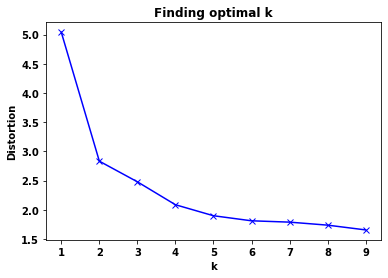

In [159]:
# KMeans
# determine k
distortions = []
for k in range(1,10):
    kmeanModel = KMeans(n_clusters=k, init='k-means++').fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(distance.cdist(X,kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    
plt.plot(range(1,10), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Finding optimal k');

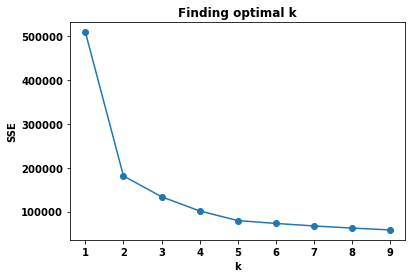

In [160]:
SSE = []
for k in range(1,10):
    kmeans = KMeans(n_clusters = k, init='k-means++')
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)

frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Finding optimal k');

optimal number of k=5

In [161]:
# Build a model with 5 clusters
kmeans = KMeans(n_clusters = 5, init='k-means++')
clusters = kmeans.fit_predict(X)

# print silhouette score of modek
print(metrics.silhouette_score(X, kmeans.labels_, metric='euclidean'))

0.44557147947270076


Silhouette score is 0.45, not bad at all.

In [162]:
X['label'] = clusters
cust_data['label'] = clusters

<ipython-input-162-083a732311b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_data['label'] = clusters


In [163]:
cust_data['label'].value_counts()

3    5139
2    4691
1    4474
0    1499
4     868
Name: label, dtype: int64

In [164]:
cust_data.head(10)

,owner_age,owner_gender,class_order,ANP,region,label
1,53.0,0,4,161515.0,2,1
3,50.0,0,10,26745.0,10,0
4,50.0,0,10,443.0,10,0
5,50.0,0,10,0.0,10,0
7,61.0,0,3,44170.0,10,3
8,60.0,0,3,30000.0,10,3
9,34.0,0,2,100000.0,14,2
10,42.0,0,2,25000.0,12,2
11,56.0,1,2,25000.0,3,1
12,28.0,0,2,50000.0,15,2


In [165]:
# average of clusters
avg_df = cust_data.groupby(['label'],as_index=False).median()
avg_df

,label,owner_age,owner_gender,class_order,ANP,region
0,0,40.0,0,8,15821.60,12
1,1,45.0,0,2,22065.00,2
2,2,42.0,0,2,19184.76,14
3,3,44.0,0,2,22040.00,10
4,4,41.0,0,7,20000.00,3


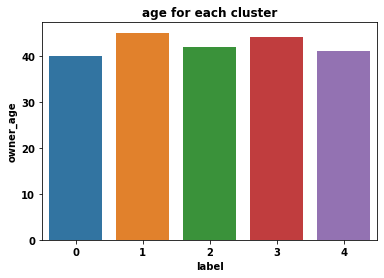

In [166]:
sns.barplot(x='label',y='owner_age',data=avg_df);
plt.title('age for each cluster');

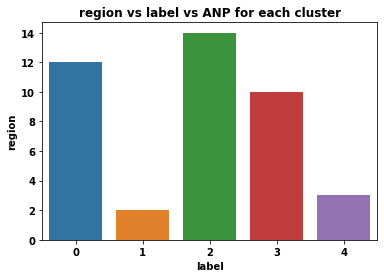

In [167]:
sns.barplot(x='label',y='region',data=avg_df);
plt.title('region vs label vs ANP for each cluster');

In [168]:
cust_data[cust_data['label'] == 1][['region']].value_counts()

region
3         1600
2         1433
1         1412
4           27
5            2
dtype: int64

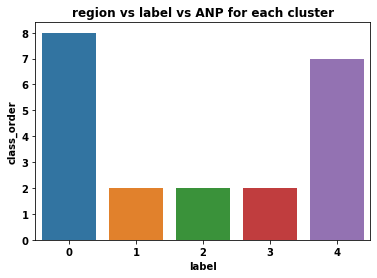

In [169]:
sns.barplot(x='label',y='class_order',data=avg_df);
plt.title('region vs label vs ANP for each cluster');

In [170]:
cust_data[cust_data['label'] == 4][['class_order']].value_counts()

class_order
10             315
6              257
5              158
7              102
9               23
8               13
dtype: int64

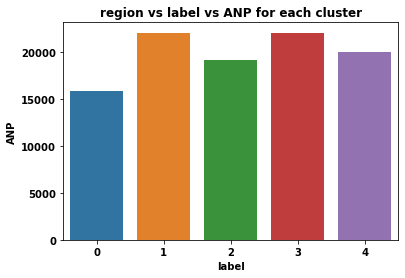

In [171]:
sns.barplot(x='label',y='ANP',data=avg_df);
plt.title('region vs label vs ANP for each cluster');

In [172]:
# predominantly male in all clusters
df_gender = pd.DataFrame(cust_data.groupby(['label','owner_gender'])['owner_gender'].count())
df_gender

owner_gender
label owner_gender              
0     0                      952
      1                      547
1     0                     3072
      1                     1402
2     0                     3157
      1                     1534
3     0                     3352
      1                     1787
4     0                      463
      1                      405

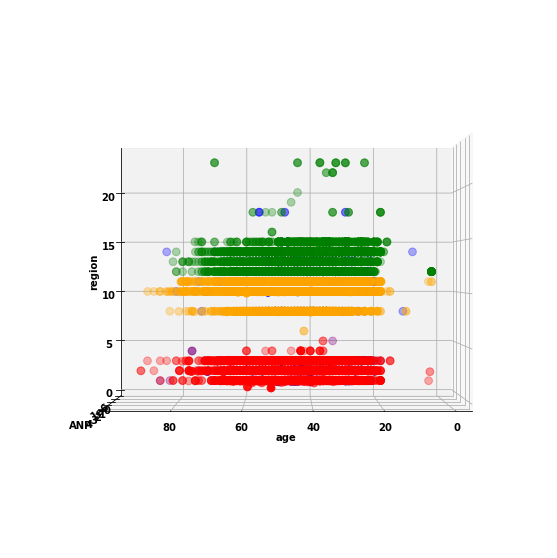

In [173]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cust_data.owner_age[cust_data.label == 0], cust_data['ANP'][cust_data.label == 0], cust_data['region'][cust_data.label == 0], c='blue', s=60)
ax.scatter(cust_data.owner_age[cust_data.label == 1], cust_data['ANP'][cust_data.label == 1], cust_data['region'][cust_data.label == 1], c='red', s=60)
ax.scatter(cust_data.owner_age[cust_data.label == 2], cust_data['ANP'][cust_data.label == 2], cust_data['region'][cust_data.label == 2], c='green', s=60)
ax.scatter(cust_data.owner_age[cust_data.label == 3], cust_data['ANP'][cust_data.label == 3], cust_data['region'][cust_data.label == 3], c='orange', s=60)
ax.scatter(cust_data.owner_age[cust_data.label == 4], cust_data['ANP'][cust_data.label == 4], cust_data['region'][cust_data.label == 4], c='purple', s=60)
ax.view_init(0, 90)
plt.xlabel('age')
plt.ylabel('ANP')
ax.set_zlabel('region')
plt.show()

With a few outliers, there is an obvious segregation due to region. 

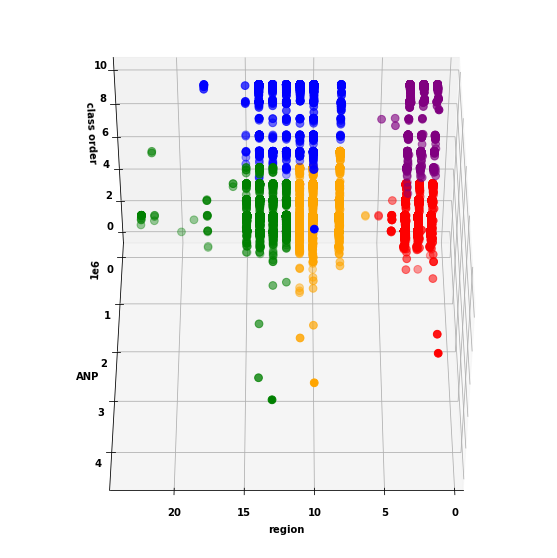

In [174]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cust_data.region[cust_data.label == 0], cust_data['ANP'][cust_data.label == 0], cust_data['class_order'][cust_data.label == 0], c='blue', s=60)
ax.scatter(cust_data.region[cust_data.label == 1], cust_data['ANP'][cust_data.label == 1], cust_data['class_order'][cust_data.label == 1], c='red', s=60)
ax.scatter(cust_data.region[cust_data.label == 2], cust_data['ANP'][cust_data.label == 2], cust_data['class_order'][cust_data.label == 2], c='green', s=60)
ax.scatter(cust_data.region[cust_data.label == 3], cust_data['ANP'][cust_data.label == 3], cust_data['class_order'][cust_data.label == 3], c='orange', s=60)
ax.scatter(cust_data.region[cust_data.label == 4], cust_data['ANP'][cust_data.label == 4], cust_data['class_order'][cust_data.label == 4], c='purple', s=60)
ax.view_init(45, 90)
plt.xlabel('region')
plt.ylabel('ANP')
ax.set_zlabel('class order')
plt.show()